In [ ]:
import pandas as pd
import os

# Especifica la ruta de la carpeta donde están los archivos
ruta_carpeta = 'data'

# Crea una lista vacía para almacenar los DataFrames individuales
lista_dfs = []

# Itera a través de los números del 1 al 9 (con formato de dos dígitos)
for i in range(1, 10):
    nombre_archivo = f'w06-SBAnational{i:02d}.csv'
    ruta_archivo = os.path.join(ruta_carpeta, nombre_archivo)

    try:
        # Lee el archivo CSV y lo añade a la lista de DataFrames
        df = pd.read_csv(ruta_archivo)
        lista_dfs.append(df)
        print(f'Se leyó correctamente el archivo: {nombre_archivo}')
    except FileNotFoundError:
        print(f'No se encontró el archivo: {nombre_archivo}')
    except Exception as e:
        print(f'Error al leer el archivo {nombre_archivo}: {e}')

# Concatena todos los DataFrames en uno solo
if lista_dfs:
    df_completo = pd.concat(lista_dfs, ignore_index=True)
    print('\nSe han combinado todos los archivos en el DataFrame "df_completo".')
else:
    print('\nNo se encontraron archivos para combinar.')



Se leyó correctamente el archivo: w06-SBAnational01.csv
Se leyó correctamente el archivo: w06-SBAnational02.csv
Se leyó correctamente el archivo: w06-SBAnational03.csv
Se leyó correctamente el archivo: w06-SBAnational04.csv
Se leyó correctamente el archivo: w06-SBAnational05.csv
Se leyó correctamente el archivo: w06-SBAnational06.csv


C:\Users\jamal\AppData\Local\Temp\ipykernel_22036\4235682833.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)


Se leyó correctamente el archivo: w06-SBAnational07.csv


C:\Users\jamal\AppData\Local\Temp\ipykernel_22036\4235682833.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)


Se leyó correctamente el archivo: w06-SBAnational08.csv
Se leyó correctamente el archivo: w06-SBAnational09.csv

Se han combinado todos los archivos en el DataFrame "df_completo".


In [3]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         899164 non-null  int64  
 1   LoanNr_ChkDgt      899164 non-null  int64  
 2   Name               899150 non-null  object 
 3   City               899134 non-null  object 
 4   State              899150 non-null  object 
 5   Zip                899164 non-null  int64  
 6   Bank               897605 non-null  object 
 7   BankState          897598 non-null  object 
 8   NAICS              899164 non-null  int64  
 9   ApprovalDate       899164 non-null  object 
 10  ApprovalFY         899164 non-null  object 
 11  Term               899164 non-null  int64  
 12  NoEmp              899164 non-null  int64  
 13  NewExist           899028 non-null  float64
 14  CreateJob          899164 non-null  int64  
 15  RetainedJob        899164 non-null  int64  
 16  Fr

In [4]:
df_completo.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
import pandas as pd

# 1. Manejo de Valores Faltantes
print("Valores Faltantes Antes del Procesamiento:")
print(df_completo.isnull().sum())

# Estrategia: Imputar faltantes en columnas de texto con 'Unknown', en numéricas con 0
for col in df_completo.columns:
    if df_completo[col].dtype == 'object':
        df_completo[col] = df_completo[col].fillna('Unknown')
    elif df_completo[col].dtype in ['int64', 'float64']:
        df_completo[col] = df_completo[col].fillna(0)

print("\nValores Faltantes Después del Procesamiento:")
print(df_completo.isnull().sum())

# 2. Corrección de Tipos de Datos
cols_a_fechas = ['ApprovalDate', 'ChgOffDate', 'DisbursementDate']
for col in cols_a_fechas:
    df_completo[col] = pd.to_datetime(df_completo[col], errors='coerce')  # 'coerce' convierte errores a NaT

cols_a_numericas = ['GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr']
for col in cols_a_numericas:
    # Eliminar '$' y ','
    df_completo[col] = df_completo[col].astype(str).str.replace(r'[$,]', '', regex=True)
    df_completo[col] = pd.to_numeric(df_completo[col], errors='coerce')

# NewExist, UrbanRural, RevLineCr, LowDoc a categóricas
df_completo['NewExist'] = df_completo['NewExist'].astype('category')
df_completo['UrbanRural'] = df_completo['UrbanRural'].astype('category')
df_completo['RevLineCr'] = df_completo['RevLineCr'].astype('category')
df_completo['LowDoc'] = df_completo['LowDoc'].astype('category')


# 3. Limpieza de Columnas Específicas
# ApprovalFY
df_completo['ApprovalFY'] = df_completo['ApprovalFY'].astype(str).str.replace(r'[^0-9]', '', regex=True).str[-2:].apply(lambda x: '20' + x if len(x) == 2 and int(x) <= 20 else ('19' + x if len(x) == 2 else x))

# FranchiseCode
df_completo['FranchiseCode'] = df_completo['FranchiseCode'].astype(str).apply(lambda x: 'Franchise' if x != '0' and x != '1' else 'No Franchise')


print("\nPrimeras Filas Después del Procesamiento:")
print(df_completo.head())

print("\nInformación del DataFrame Después del Procesamiento:")
print(df_completo.info())

Valores Faltantes Antes del Procesamiento:
LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64


KeyboardInterrupt: 

In [ ]:
nuevos_nombres = {
    'LoanNr_ChkDgt': 'ID_Prestamo',
    'Name': 'Nombre_Empresa',
    'City': 'Ciudad_Empresa',
    'State': 'Estado_Empresa',
    'Zip': 'Codigo_Postal_Empresa',
    'Bank': 'Nombre_Banco',
    'BankState': 'Estado_Banco',
    'NAICS': 'Codigo_NAICS',
    'ApprovalDate': 'Fecha_Aprobacion',
    'ApprovalFY': 'Anho_Fiscal_Aprobacion',
    'Term': 'Plazo_Meses',
    'NoEmp': 'Numero_Empleados',
    'NewExist': 'Negocio_Existente',
    'CreateJob': 'Empleos_Creados',
    'RetainedJob': 'Empleos_Retenidos',
    'FranchiseCode': 'Codigo_Franquicia',
    'UrbanRural': 'Area_UrbanRural',
    'RevLineCr': 'Linea_Credito_Rotativa',
    'LowDoc': 'Programa_LowDoc',
    'ChgOffDate': 'Fecha_Incumplimiento',
    'DisbursementDate': 'Fecha_Desembolso',
    'DisbursementGross': 'Monto_Desembolsado',
    'BalanceGross': 'Monto_Adeudado',
    'MIS_Status': 'Estado_Prestamo',
    'ChgOffPrinGr': 'Monto_Incumplimiento',
    'GrAppv': 'Monto_Aprobado_Banco',
    'SBA_Appv': 'Monto_Aprobado_SBA'
}

In [ ]:
df_completo = df_completo.rename(columns=nuevos_nombres)
print(df_completo.head())
print(df_completo.info())

   ID_Prestamo                 Nombre_Empresa Ciudad_Empresa Estado_Empresa  \
0   1000014003                 ABC HOBBYCRAFT     EVANSVILLE             IN   
1   1000024006    LANDMARK BAR & GRILLE (THE)      NEW PARIS             IN   
2   1000034009          WHITLOCK DDS, TODD M.    BLOOMINGTON             IN   
3   1000044001  BIG BUCKS PAWN & JEWELRY, LLC   BROKEN ARROW             OK   
4   1000054004    ANASTASIA CONFECTIONS, INC.        ORLANDO             FL   

   Codigo_Postal_Empresa                   Nombre_Banco Estado_Banco  \
0                  47711               FIFTH THIRD BANK           OH   
1                  46526                1ST SOURCE BANK           IN   
2                  47401        GRANT COUNTY STATE BANK           IN   
3                  74012  1ST NATL BK & TR CO OF BROKEN           OK   
4                  32801        FLORIDA BUS. DEVEL CORP           FL   

   Codigo_NAICS Fecha_Aprobacion Anho_Fiscal_Aprobacion  ...  \
0        451120       1997-0

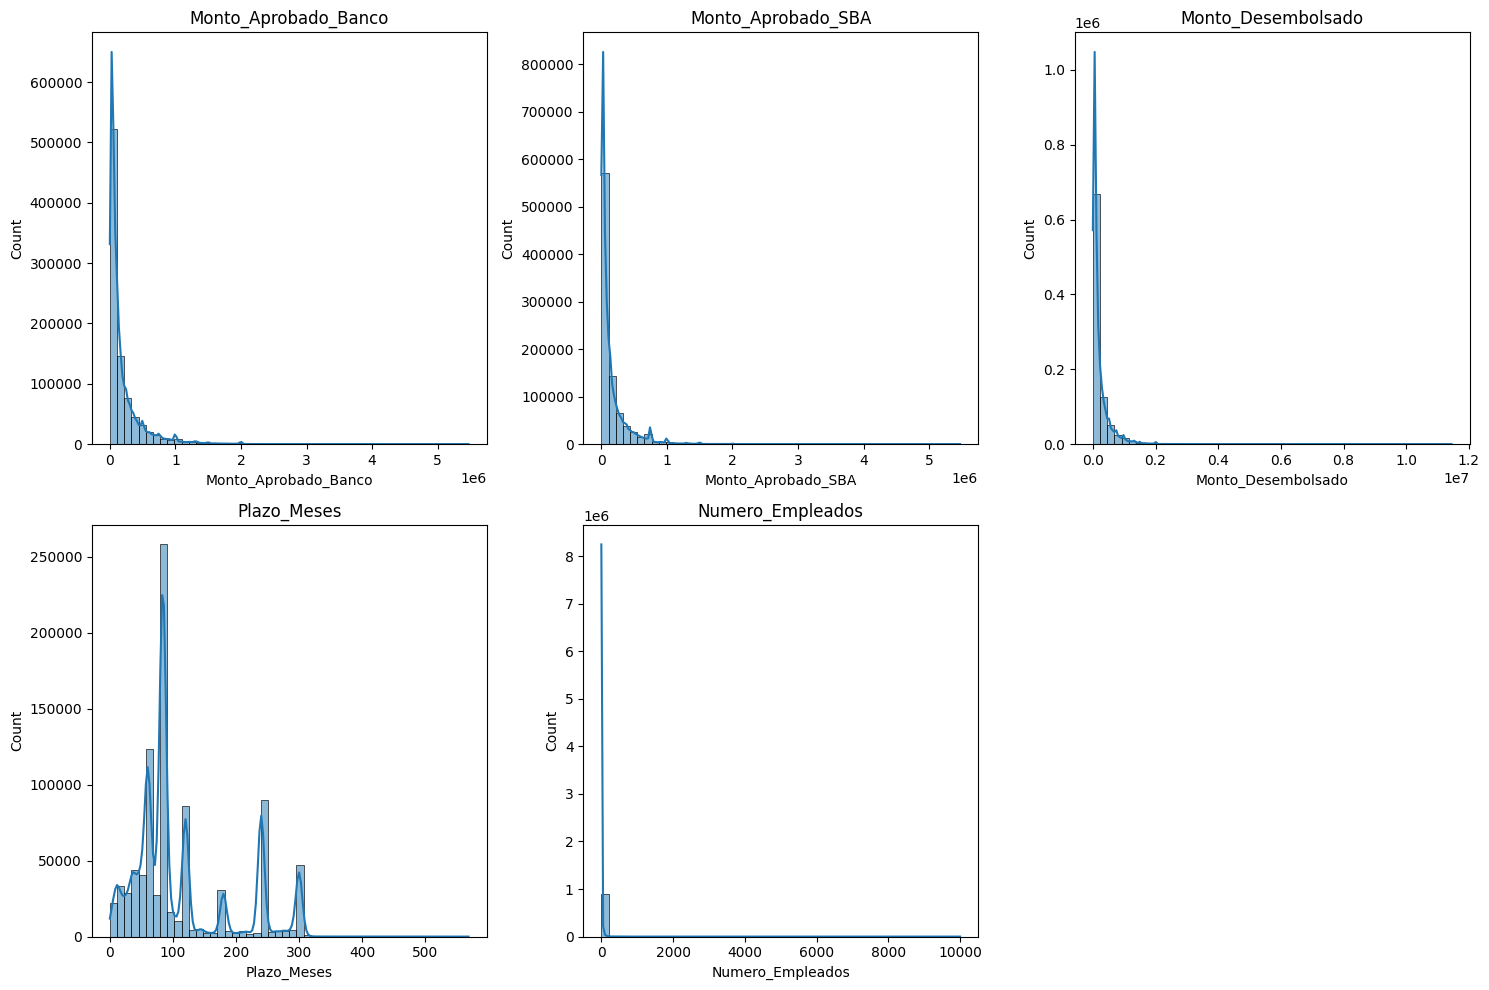

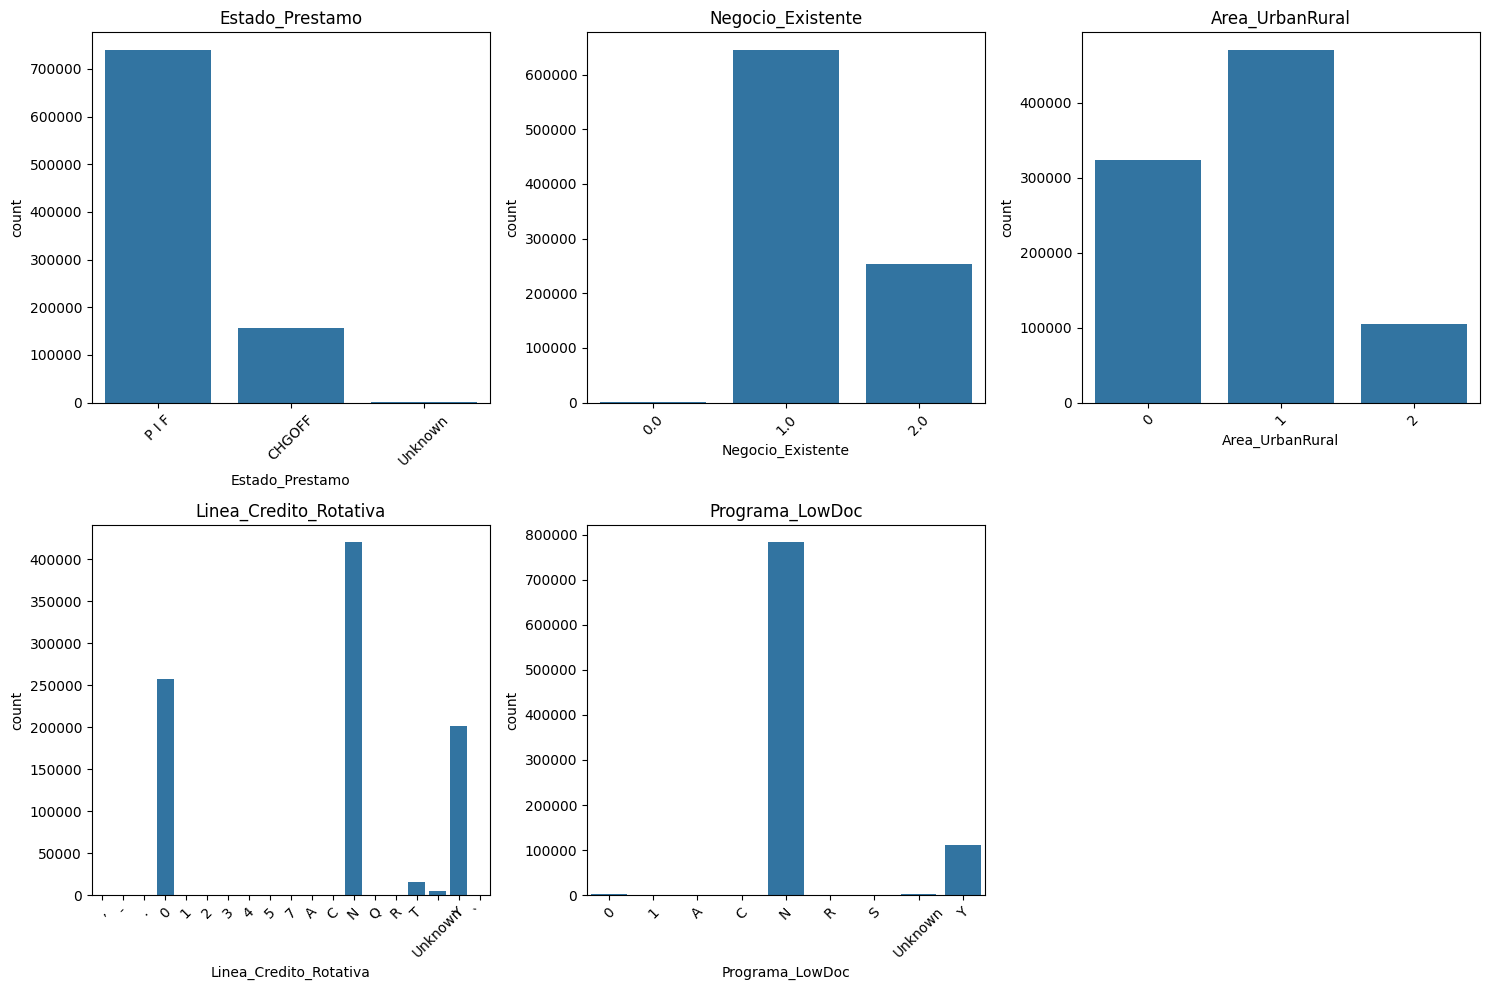

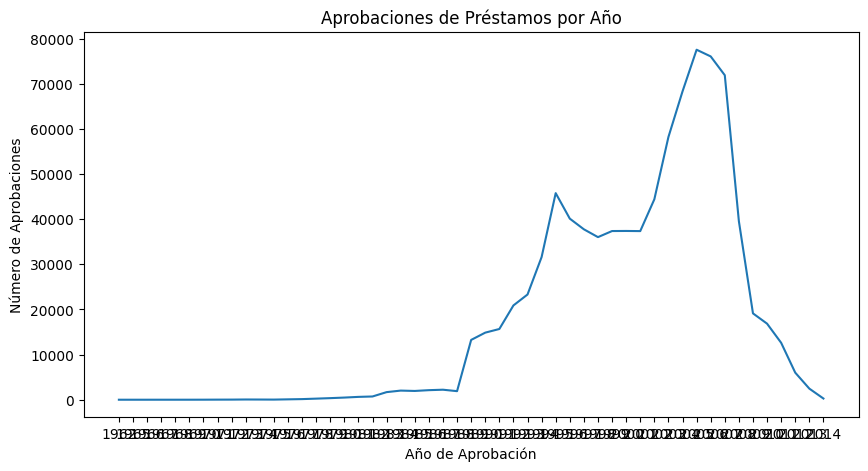

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogramas para Variables Numéricas
cols_numericas = ['Monto_Aprobado_Banco', 'Monto_Aprobado_SBA', 'Monto_Desembolsado', 'Plazo_Meses', 'Numero_Empleados']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_numericas, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_completo[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# 2. Gráficos de Barras para Variables Categóricas
cols_categoricas = ['Estado_Prestamo', 'Negocio_Existente', 'Area_UrbanRural', 'Linea_Credito_Rotativa', 'Programa_LowDoc']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_categoricas, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df_completo, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Gráfico de Líneas para Aprobaciones por Año
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_completo['Anho_Fiscal_Aprobacion'].value_counts().sort_index().index,
             y=df_completo['Anho_Fiscal_Aprobacion'].value_counts().sort_index().values)
plt.title('Aprobaciones de Préstamos por Año')
plt.xlabel('Año de Aprobación')
plt.ylabel('Número de Aprobaciones')
plt.show()

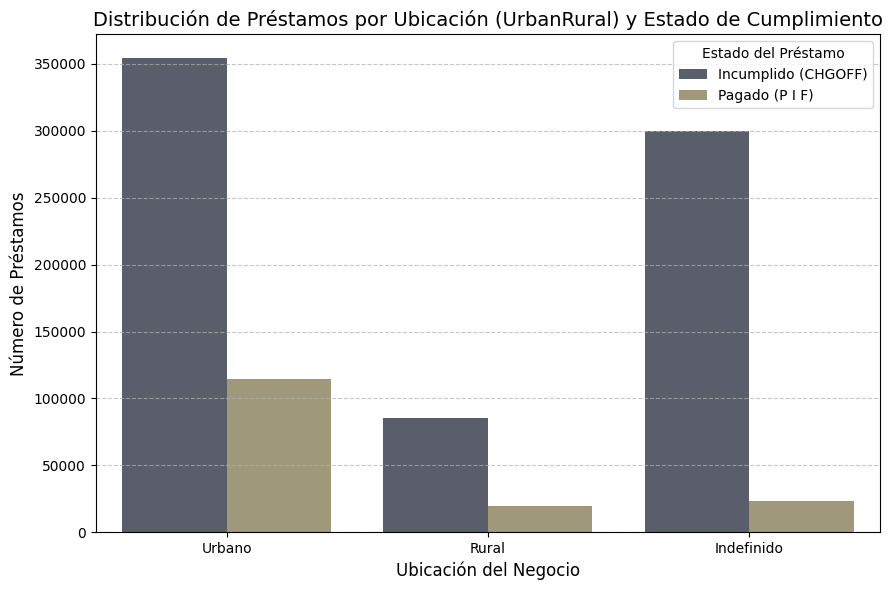


La gráfica 'UrbanRural vs MIS_Status' ha sido generada.
Guárdala como una imagen (por ejemplo, 'urban_rural_mis_status.png') y luego insértala en la Página 3 de tu memoria.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cargar el dataset ---
# Asegúrate de que 'tu_archivo_sba.csv' sea la ruta correcta a tu archivo de datos
df = df_completo

# --- Limpieza básica para la gráfica (si es necesario) ---
# Asegurarse de que UrbanRural y MIS_Status estén en el formato correcto
# Si UrbanRural tiene valores diferentes a 0, 1, 2, podrías necesitar una limpieza adicional.
# De acuerdo a tu descripción de archivo, UrbanRural es 1=Urbano, 2=Rural, 0=Undefined
# MIS_Status es 'P I F' o 'CHGOFF'

# Mapear UrbanRural a etiquetas más descriptivas para el gráfico
df['UrbanRural_Label'] = df['UrbanRural'].map({1: 'Urbano', 2: 'Rural', 0: 'Indefinido'})

# --- Generar la gráfica ---
plt.figure(figsize=(9, 6))
sns.countplot(x='UrbanRural_Label', hue='MIS_Status', data=df, palette='cividis', order=['Urbano', 'Rural', 'Indefinido'])
plt.title('Distribución de Préstamos por Ubicación (UrbanRural) y Estado de Cumplimiento', fontsize=14)
plt.xlabel('Ubicación del Negocio', fontsize=12)
plt.ylabel('Número de Préstamos', fontsize=12)
plt.legend(title='Estado del Préstamo', labels=['Incumplido (CHGOFF)', 'Pagado (P I F)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nLa gráfica 'UrbanRural vs MIS_Status' ha sido generada.")
print("Guárdala como una imagen (por ejemplo, 'urban_rural_mis_status.png') y luego insértala en la Página 3 de tu memoria.")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# 1. Preparación de los Datos para el Modelado
# Codificación de la variable objetivo
df_completo['Estado_Prestamo_Codificado'] = df_completo['Estado_Prestamo'].map({'P I F': 0, 'CHGOFF': 1})
df_completo = df_completo.dropna(subset=['Estado_Prestamo_Codificado'])  # Eliminar filas con NaN en la variable objetivo

# Selección de características
features_numericas = ['Plazo_Meses', 'Numero_Empleados', 'Monto_Aprobado_Banco', 'Monto_Aprobado_SBA', 'Monto_Desembolsado']
features_categoricas = ['Negocio_Existente', 'Area_UrbanRural', 'Linea_Credito_Rotativa', 'Programa_LowDoc', 'Estado_Empresa']

# Manejo de variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', features_numericas),  # No transformar las numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas)]) # One-hot encoding

# División de los datos
X = df_completo[features_numericas + features_categoricas]
y = df_completo['Estado_Prestamo_Codificado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Construcción y Entrenamiento del Modelo
modelo = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='liblinear', random_state=42))]) # Usar solver='liblinear' para conjuntos de datos pequeños

# Entrenar el modelo
modelo.fit(X_train, y_train)

# 3. Evaluación del Modelo
# Predicciones
y_pred = modelo.predict(X_test)

# Métricas de evaluación
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    147629
         1.0       0.48      0.02      0.04     31805

    accuracy                           0.82    179434
   macro avg       0.65      0.51      0.47    179434
weighted avg       0.76      0.82      0.75    179434


Matriz de Confusión:
[[147003    626]
 [ 31217    588]]


In [13]:
df_completo

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,Unknown,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,Unknown,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,Unknown,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,Unknown,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,Unknown,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,Unknown,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,Unknown,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,Unknown,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [15]:
df_completo['MIS_Status'].unique()

array(['P I F', 'CHGOFF', nan], dtype=object)

In [19]:
import pandas as pd
import numpy as np # Necesario si hay valores NaN en tu columna

# Suponiendo que tu DataFrame df_completo ya está cargado.
# Si no lo tienes, puedes usar este ejemplo para probar:
# data_ejemplo = {
#     'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'mis status': ['P I F', 'CHGOFF', 'P I F', 'ACTIVO', 'CHGOFF', np.nan, 'P I F', 'ACTIVO', 'P I F', 'INACTIVO'],
#     'valor': [100, 200, 150, 300, 250, 180, 220, 110, 90, 50]
# }
# df_completo = pd.DataFrame(data_ejemplo)

# 1. Obtener el conteo de cada valor único en la columna 'mis status'
#    Por defecto, .value_counts() no incluye los valores NaN en el conteo,
#    lo cual es ideal para la base de nuestros porcentajes.
conteos_status = df_completo['MIS_Status'].value_counts()

# 2. Extraer los conteos específicos para 'CHGOFF' y 'P I F'
#    Usamos .get() para evitar errores si alguno de los valores no existe en la columna
conteo_chgoff = conteos_status.get('CHGOFF', 0) # Si 'CHGOFF' no existe, el conteo será 0
conteo_pif = conteos_status.get('P I F', 0)     # Si 'P I F' no existe, el conteo será 0

# 3. Calcular el total combinado de 'CHGOFF' y 'P I F'
total_chgoff_pif = conteo_chgoff + conteo_pif

# 4. Calcular el total de entradas NO NULAS en la columna 'mis status'
#    Esto nos dará la base para calcular los porcentajes de forma significativa.
total_no_nulos_columna = df_completo['MIS_Status'].count()

# 5. Calcular los porcentajes
#    Aseguramos que no haya división por cero si la columna está vacía o solo tiene NaN
porcentaje_chgoff = (conteo_chgoff / total_no_nulos_columna) * 100 if total_no_nulos_columna > 0 else 0
porcentaje_pif = (conteo_pif / total_no_nulos_columna) * 100 if total_no_nulos_columna > 0 else 0
porcentaje_total_chgoff_pif = (total_chgoff_pif / total_no_nulos_columna) * 100 if total_no_nulos_columna > 0 else 0

print(f"--- Análisis de la Columna 'MIS_Status' ---")
print(f"Total de 'CHGOFF': {conteo_chgoff} unidades")
print(f"Total de 'P I F': {conteo_pif} unidades")
print(f"----------------------------------------")
print(f"Total combinado de 'CHGOFF' y 'P I F': {total_chgoff_pif} unidades")
print(f"----------------------------------------")
print(f"Porcentaje de 'CHGOFF' sobre el total de no nulos: {porcentaje_chgoff:.2f}%")
print(f"Porcentaje de 'P I F' sobre el total de no nulos: {porcentaje_pif:.2f}%")
print(f"Porcentaje combinado de 'CHGOFF' y 'P I F' sobre el total de no nulos: {porcentaje_total_chgoff_pif:.2f}%")

print(f"\n(Base de cálculo: {total_no_nulos_columna} entradas no nulas en 'mis status')")
print(f"(Número total de entradas en 'mis status', incluyendo NaN: {len(df_completo['MIS_Status'])})")

--- Análisis de la Columna 'MIS_Status' ---
Total de 'CHGOFF': 157558 unidades
Total de 'P I F': 739609 unidades
----------------------------------------
Total combinado de 'CHGOFF' y 'P I F': 897167 unidades
----------------------------------------
Porcentaje de 'CHGOFF' sobre el total de no nulos: 17.56%
Porcentaje de 'P I F' sobre el total de no nulos: 82.44%
Porcentaje combinado de 'CHGOFF' y 'P I F' sobre el total de no nulos: 100.00%

(Base de cálculo: 897167 entradas no nulas en 'mis status')
(Número total de entradas en 'mis status', incluyendo NaN: 899164)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb  # Importar LightGBM

# 1. Preparación de los Datos para el Modelado
# Codificación de la variable objetivo
df_completo['Estado_Prestamo_Codificado'] = df_completo['Estado_Prestamo'].map({'P I F': 0, 'CHGOFF': 1})
df_completo = df_completo.dropna(subset=['Estado_Prestamo_Codificado'])  # Eliminar filas con NaN en la variable objetivo

# Selección de características
features_numericas = ['Plazo_Meses', 'Numero_Empleados', 'Monto_Aprobado_Banco', 'Monto_Aprobado_SBA', 'Monto_Desembolsado']
features_categoricas = ['Negocio_Existente', 'Area_UrbanRural', 'Linea_Credito_Rotativa', 'Programa_LowDoc', 'Estado_Empresa']

# Manejo de variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', features_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas)])

# División de los datos
X = df_completo[features_numericas + features_categoricas]
y = df_completo['Estado_Prestamo_Codificado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y

# 2. Construcción y Entrenamiento del Modelo (LightGBM)
modelo_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', lgb.LGBMClassifier(objective='binary',
                                                      metric='binary_logloss',
                                                      boosting_type='gbdt',
                                                      n_estimators=100,
                                                      learning_rate=0.05,
                                                      class_weight='balanced', # Manejo del desbalance
                                                      random_state=42))])

# Entrenar el modelo
modelo_lgbm.fit(X_train, y_train)

# 3. Evaluación del Modelo
# Predicciones
y_pred_lgbm = modelo_lgbm.predict(X_test)

# Métricas de evaluación
print("Informe de Clasificación (LightGBM):")
print(classification_report(y_test, y_pred_lgbm))

print("\nMatriz de Confusión (LightGBM):")
print(confusion_matrix(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 126046, number of negative: 591687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1405
[LightGBM] [Info] Number of data points in the train set: 717733, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Informe de Clasificación (LightGBM):
              precision    recall  f1-score   support

           0       0.98      0.90      0.94    147922
           1       0.65      0.91      0.76     31512

    accuracy                           0.90    179434
   macro avg       0.81      0.90      0.85    179434
weighted avg       0.92      0.90      0.90    179434


Matriz de Confusión (LightGBM):
[[132423  15499]
 [  2856  28656]]


c:\Users\jamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 126046, number of negative: 591687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1405
[LightGBM] [Info] Number of data points in the train set: 717733, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\jamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Estadísticas de las Probabilidades de Incumplimiento:
count    179434.000000
mean          0.282044
std           0.334265
min           0.014021
25%           0.029928
50%           0.095578
75%           0.490972
max           0.981231
dtype: float64


c:\Users\jamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


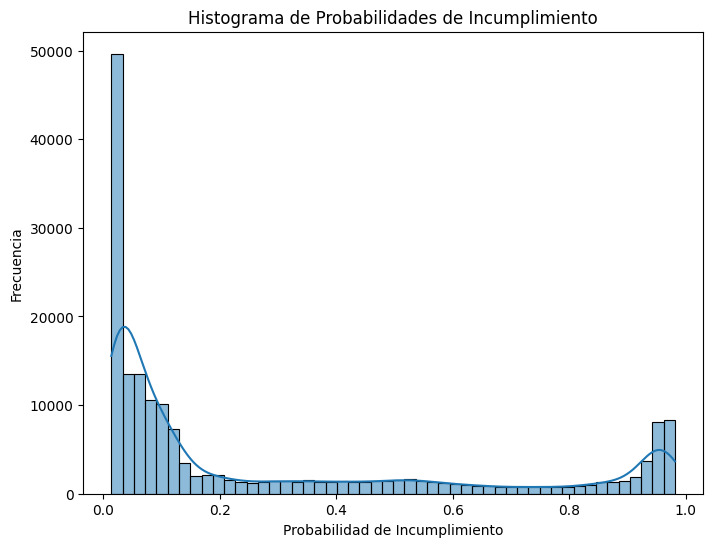

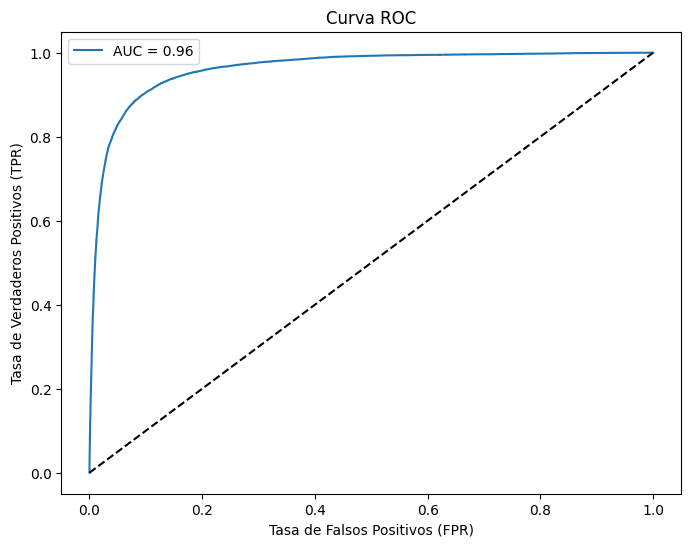

c:\Users\jamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


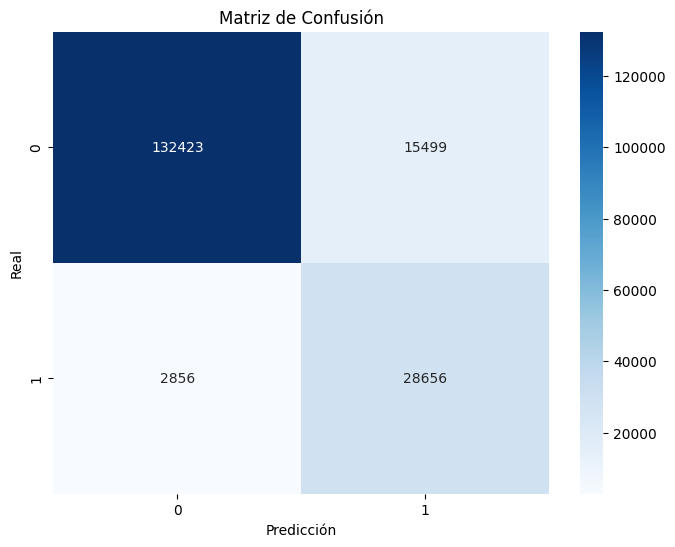

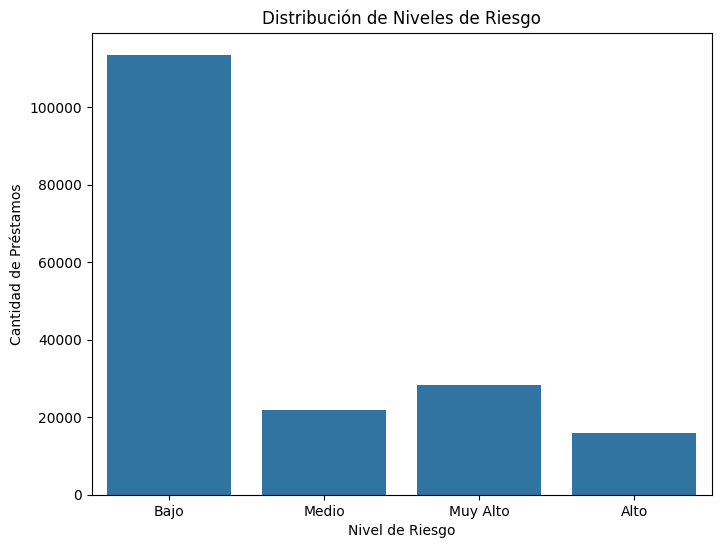

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparación de los Datos para el Modelado (Igual que antes)
df_completo['Estado_Prestamo_Codificado'] = df_completo['Estado_Prestamo'].map({'P I F': 0, 'CHGOFF': 1})
df_completo = df_completo.dropna(subset=['Estado_Prestamo_Codificado'])
features_numericas = ['Plazo_Meses', 'Numero_Empleados', 'Monto_Aprobado_Banco', 'Monto_Aprobado_SBA', 'Monto_Desembolsado']
features_categoricas = ['Negocio_Existente', 'Area_UrbanRural', 'Linea_Credito_Rotativa', 'Programa_LowDoc', 'Estado_Empresa']
preprocessor = ColumnTransformer(
transformers=[
('num', 'passthrough', features_numericas),
('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas)])
X = df_completo[features_numericas + features_categoricas]
y = df_completo['Estado_Prestamo_Codificado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Construcción y Entrenamiento del Modelo (Igual que antes)
modelo_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
('classifier', lgb.LGBMClassifier(objective='binary',
metric='binary_logloss',
boosting_type='gbdt',
n_estimators=100,
learning_rate=0.05,
class_weight='balanced',
random_state=42))])
modelo_lgbm.fit(X_train, y_train)

# 3. Evaluación del Modelo y Extracción del Riesgo
# Obtener Probabilidades
y_pred_proba = modelo_lgbm.predict_proba(X_test)[:, 1]

# Analizar Probabilidades
print("\nEstadísticas de las Probabilidades de Incumplimiento:")
print(pd.Series(y_pred_proba).describe())

# Categorizar el Riesgo (Ejemplo)
umbrales = [0.2, 0.5, 0.8]
niveles_riesgo = np.select(
[y_pred_proba < umbrales[0], y_pred_proba < umbrales[1], y_pred_proba < umbrales[2]],
['Bajo', 'Medio', 'Alto'],
default='Muy Alto'
)

resultados = pd.DataFrame({'Real': y_test, 'Predicción': modelo_lgbm.predict(X_test), 'Probabilidad_Incumplimiento': y_pred_proba, 'Nivel_Riesgo': niveles_riesgo})

# 4. Visualizaciones
# 4.1 Histograma de Probabilidades de Incumplimiento
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, bins=50, kde=True)
plt.title('Histograma de Probabilidades de Incumplimiento')
plt.xlabel('Probabilidad de Incumplimiento')
plt.ylabel('Frecuencia')
plt.show()

# 4.2 Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para rendimiento aleatorio
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, modelo_lgbm.predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=niveles_riesgo)
plt.title('Distribución de Niveles de Riesgo')
plt.xlabel('Nivel de Riesgo')
plt.ylabel('Cantidad de Préstamos')
plt.show()

[LightGBM] [Info] Number of positive: 126046, number of negative: 591687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1405
[LightGBM] [Info] Number of data points in the train set: 717733, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


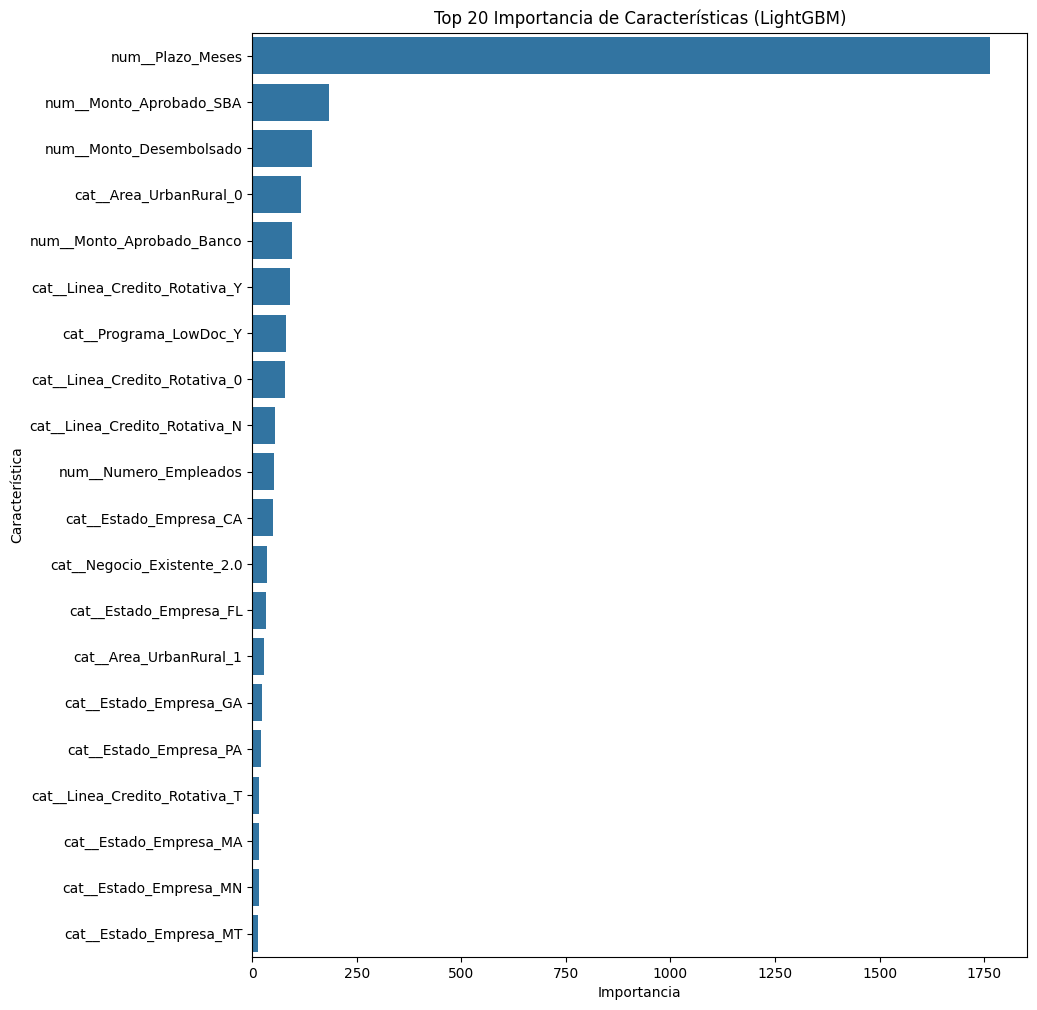

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparación de los Datos para el Modelado (Igual que antes)
df_completo['Estado_Prestamo_Codificado'] = df_completo['Estado_Prestamo'].map({'P I F': 0, 'CHGOFF': 1})
df_completo = df_completo.dropna(subset=['Estado_Prestamo_Codificado'])
features_numericas = ['Plazo_Meses', 'Numero_Empleados', 'Monto_Aprobado_Banco', 'Monto_Aprobado_SBA', 'Monto_Desembolsado']
features_categoricas = ['Negocio_Existente', 'Area_UrbanRural', 'Linea_Credito_Rotativa', 'Programa_LowDoc', 'Estado_Empresa']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', features_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas)])
X = df_completo[features_numericas + features_categoricas]
y = df_completo['Estado_Prestamo_Codificado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Construcción y Entrenamiento del Modelo (Ligeramente modificado para guardar el modelo entrenado)
modelo_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', lgb.LGBMClassifier(objective='binary',
                                                      metric='binary_logloss',
                                                      boosting_type='gbdt',
                                                      n_estimators=100,
                                                      learning_rate=0.05,
                                                      class_weight='balanced',
                                                      random_state=42))])
modelo_lgbm.fit(X_train, y_train) # Guardamos el modelo entrenado aquí
modelo_entrenado = modelo_lgbm.named_steps['classifier'] # Accedemos al modelo entrenado

# 3. Visualización de Importancia de Características
importancia_caracteristicas = pd.DataFrame({
    'Característica': modelo_lgbm.named_steps['preprocessor'].get_feature_names_out(),
    'Importancia': modelo_lgbm.named_steps['classifier'].feature_importances_
}).sort_values(by='Importancia', ascending=False)

top_20_caracteristicas = importancia_caracteristicas.head(20) # Select top 20 features

plt.figure(figsize=(10, 12))
sns.barplot(x='Importancia', y='Característica', data=top_20_caracteristicas)
plt.title('Top 20 Importancia de Características (LightGBM)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

Basic Statistics for Loan Term (months):
count    897167.000000
mean        110.848592
std          78.900862
min           0.000000
25%          60.000000
50%          84.000000
75%         120.000000
max         569.000000
Name: Plazo_Meses, dtype: float64


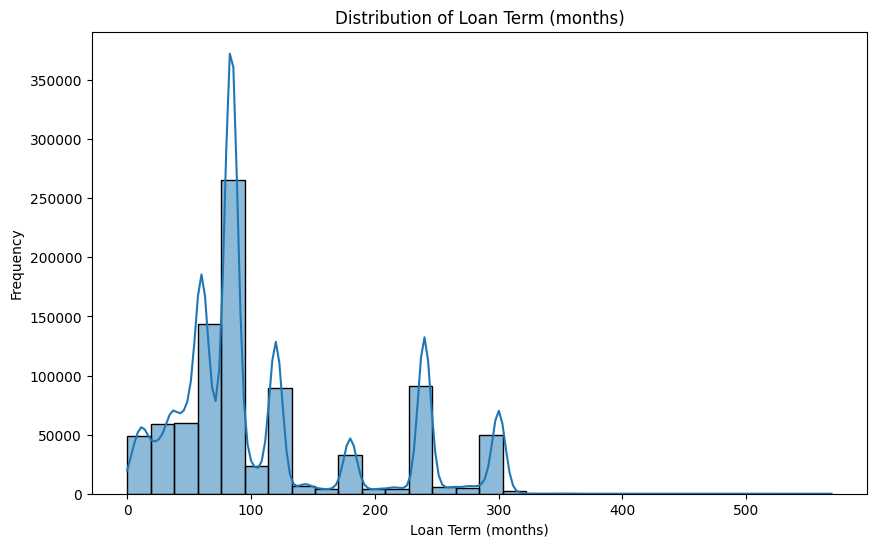

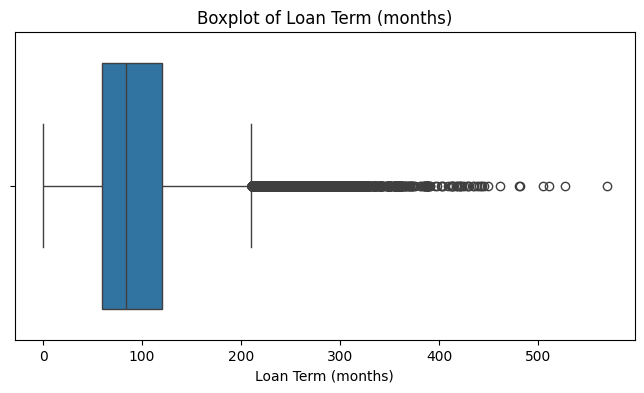

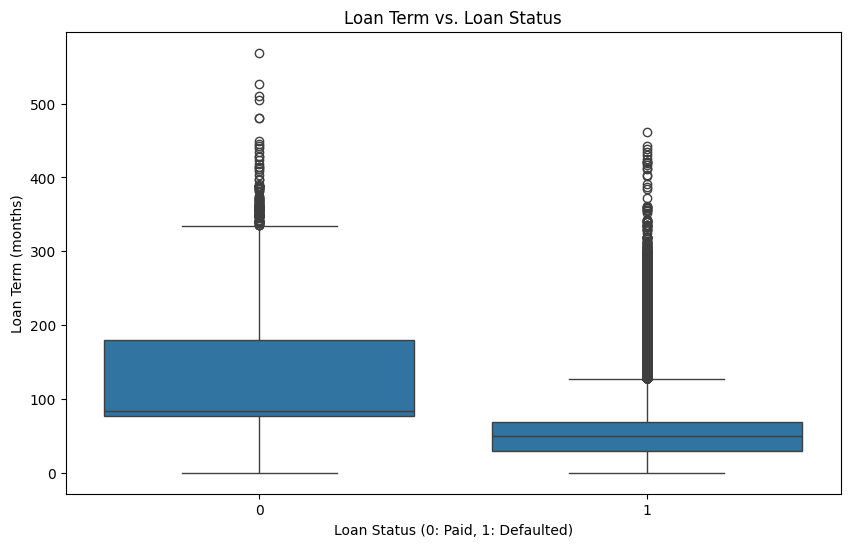

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the df_completo DataFrame

# EDA on 'num_Plazo_Meses' (Loan term in months)

# 1. Basic Statistics
print("Basic Statistics for Loan Term (months):")
print(df_completo['Plazo_Meses'].describe())

# 2. Distribution Visualization

# a) Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_completo['Plazo_Meses'], bins=30, kde=True)  # Adjust bins as needed
plt.title('Distribution of Loan Term (months)')
plt.xlabel('Loan Term (months)')
plt.ylabel('Frequency')
plt.show()

# b) Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_completo['Plazo_Meses'])
plt.title('Boxplot of Loan Term (months)')
plt.xlabel('Loan Term (months)')
plt.show()

# 3. Further Analysis (Optional - Requires other variables)

# Example: Loan Term vs. Loan Status (if you want to see how term relates to default)
if 'Estado_Prestamo_Codificado' in df_completo.columns: #  safe check
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Estado_Prestamo_Codificado', y='Plazo_Meses', data=df_completo)
    plt.title('Loan Term vs. Loan Status')
    plt.xlabel('Loan Status (0: Paid, 1: Defaulted)')
    plt.ylabel('Loan Term (months)')
    plt.show()

In [ ]:
df_completo

,ID_Prestamo,Nombre_Empresa,Ciudad_Empresa,Estado_Empresa,Codigo_Postal_Empresa,Nombre_Banco,Estado_Banco,Codigo_NAICS,Fecha_Aprobacion,Anho_Fiscal_Aprobacion,...,Programa_LowDoc,Fecha_Incumplimiento,Fecha_Desembolso,Monto_Desembolsado,Monto_Adeudado,Estado_Prestamo,Monto_Incumplimiento,Monto_Aprobado_Banco,Monto_Aprobado_SBA,Estado_Prestamo_Codificado
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,Y,NaT,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,Y,NaT,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,N,NaT,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0,0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,Y,NaT,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,N,NaT,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,...,N,NaT,1997-09-30,70000.0,0.0,P I F,0.0,70000.0,56000.0,0
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,N,NaT,1997-10-31,85000.0,0.0,P I F,0.0,85000.0,42500.0,0
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,...,N,NaT,1997-09-30,300000.0,0.0,P I F,0.0,300000.0,225000.0,0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,...,Y,2000-03-08,1997-03-31,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0,1


In [ ]:
import pandas as pd

# 1.1 Extract First Two Digits of NAICS (and create the new DataFrame)
df_model = df_completo.copy()  # Create a copy to avoid modifying the original immediately
df_model['NAICS_2digit'] = df_model['Codigo_NAICS'].astype(str).str[:2]

# Display the first few rows and info about the new DataFrame
print("First few rows of df_model:")
print(df_model.head())
print("\nInformation about df_model:")
print(df_model.info())

First few rows of df_model:
   ID_Prestamo                 Nombre_Empresa Ciudad_Empresa Estado_Empresa  \
0   1000014003                 ABC HOBBYCRAFT     EVANSVILLE             IN   
1   1000024006    LANDMARK BAR & GRILLE (THE)      NEW PARIS             IN   
2   1000034009          WHITLOCK DDS, TODD M.    BLOOMINGTON             IN   
3   1000044001  BIG BUCKS PAWN & JEWELRY, LLC   BROKEN ARROW             OK   
4   1000054004    ANASTASIA CONFECTIONS, INC.        ORLANDO             FL   

   Codigo_Postal_Empresa                   Nombre_Banco Estado_Banco  \
0                  47711               FIFTH THIRD BANK           OH   
1                  46526                1ST SOURCE BANK           IN   
2                  47401        GRANT COUNTY STATE BANK           IN   
3                  74012  1ST NATL BK & TR CO OF BROKEN           OK   
4                  32801        FLORIDA BUS. DEVEL CORP           FL   

   Codigo_NAICS Fecha_Aprobacion Anho_Fiscal_Aprobacion  ...  \


In [ ]:
df_model.head()

,ID_Prestamo,Nombre_Empresa,Ciudad_Empresa,Estado_Empresa,Codigo_Postal_Empresa,Nombre_Banco,Estado_Banco,Codigo_NAICS,Fecha_Aprobacion,Anho_Fiscal_Aprobacion,...,Fecha_Incumplimiento,Fecha_Desembolso,Monto_Desembolsado,Monto_Adeudado,Estado_Prestamo,Monto_Incumplimiento,Monto_Aprobado_Banco,Monto_Aprobado_SBA,Estado_Prestamo_Codificado,NAICS_2digit
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,NaT,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,0,45
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,NaT,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,0,72
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,NaT,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0,0,62
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,NaT,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0,0,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,NaT,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0,0,0


In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897167 entries, 0 to 899163
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ID_Prestamo                 897167 non-null  int64         
 1   Nombre_Empresa              897167 non-null  object        
 2   Ciudad_Empresa              897167 non-null  object        
 3   Estado_Empresa              897167 non-null  object        
 4   Codigo_Postal_Empresa       897167 non-null  int64         
 5   Nombre_Banco                897167 non-null  object        
 6   Estado_Banco                897167 non-null  object        
 7   Codigo_NAICS                897167 non-null  int64         
 8   Fecha_Aprobacion            897167 non-null  datetime64[ns]
 9   Anho_Fiscal_Aprobacion      897167 non-null  object        
 10  Plazo_Meses                 897167 non-null  int64         
 11  Numero_Empleados            897167 non-null 

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib # O pickle, para guardar modelos

In [ ]:

df = df_completo

print(df.info())

Dataset cargado.
<class 'pandas.core.frame.DataFrame'>
Index: 897167 entries, 0 to 899163
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ID_Prestamo                 897167 non-null  int64         
 1   Nombre_Empresa              897167 non-null  object        
 2   Ciudad_Empresa              897167 non-null  object        
 3   Estado_Empresa              897167 non-null  object        
 4   Codigo_Postal_Empresa       897167 non-null  int64         
 5   Nombre_Banco                897167 non-null  object        
 6   Estado_Banco                897167 non-null  object        
 7   Codigo_NAICS                897167 non-null  int64         
 8   Fecha_Aprobacion            897167 non-null  datetime64[ns]
 9   Anho_Fiscal_Aprobacion      897167 non-null  object        
 10  Plazo_Meses                 897167 non-null  int64         
 11  Numero_Empleados           

In [ ]:
# Definir la variable objetivo para clasificación
# ASUNCION: Estado_Prestamo_Codificado es 0 para Pagado, 1 para Incumplimiento (o viceversa)
# Necesitas confirmar esta codificación.
target_clasificacion = 'Estado_Prestamo_Codificado'
y_clasificacion = df[target_clasificacion]

# Definir las características (X) para clasificación
# Excluimos la variable objetivo y columnas relacionadas con el resultado (incumplimiento)
# Excluimos columnas con muy alta cardinalidad o identificadores que no son features directas
features_clasificacion = [col for col in df.columns if col not in [
    target_clasificacion,
    'ID_Prestamo',
    'Fecha_Incumplimiento', # Resultado del incumplimiento
    'Monto_Incumplimiento', # Monto cargado, resultado del incumplimiento
    'Monto_Adeudado',       # Saldo pendiente, a menudo relevante en el momento del incumplimiento
    'Estado_Prestamo',      # La versión original de la variable objetivo codificada
    'Nombre_Empresa',       # Alta cardinalidad
    'Ciudad_Empresa',       # Alta cardinalidad
    'Nombre_Banco'          # Alta cardinalidad
]]

X_clasificacion = df[features_clasificacion]

print(f"Variable objetivo para clasificación: {target_clasificacion}")
print(f"Número de características para clasificación: {len(features_clasificacion)}")
print("Primeras filas de X_clasificacion:")
print(X_clasificacion.head())

# Verificar el desbalanceo en la variable objetivo de clasificación
print("\nDistribución de la variable objetivo de clasificación:")
print(y_clasificacion.value_counts())
print(f"Proporción de la clase minoritaria: {y_clasificacion.value_counts(normalize=True).min():.4f}")

Variable objetivo para clasificación: Estado_Prestamo_Codificado
Número de características para clasificación: 19
Primeras filas de X_clasificacion:
  Estado_Empresa  Codigo_Postal_Empresa Estado_Banco  Codigo_NAICS  \
0             IN                  47711           OH        451120   
1             IN                  46526           IN        722410   
2             IN                  47401           IN        621210   
3             OK                  74012           OK             0   
4             FL                  32801           FL             0   

  Fecha_Aprobacion Anho_Fiscal_Aprobacion  Plazo_Meses  Numero_Empleados  \
0       1997-02-28                   1997           84                 4   
1       1997-02-28                   1997           60                 2   
2       1997-02-28                   1997          180                 7   
3       1997-02-28                   1997           60                 2   
4       1997-02-28                   1997         

In [ ]:
# Identificar tipos de columnas para preprocesamiento
# Re-evaluar los tipos de object/category que no excluimos
categorical_cols_clasificacion = X_clasificacion.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols_clasificacion = X_clasificacion.select_dtypes(include=['datetime64[ns]']).columns.tolist()
numeric_cols_clasificacion = X_clasificacion.select_dtypes(include=np.number).columns.tolist()

print(f"\nColumnas categóricas a procesar: {categorical_cols_clasificacion}")
print(f"Columnas datetime a procesar: {datetime_cols_clasificacion}")
print(f"Columnas numéricas a mantener: {numeric_cols_clasificacion}")

# Preprocesamiento para columnas datetime: extraer año, mes, día, y quizás calcular alguna duración
def create_date_features(df, date_col):
    df = df.copy()
    if date_col in df.columns and pd.api.types.is_datetime64_any_dtype(df[date_col]):
        # Manejar NaNs en fechas: para la clasificación, podríamos imputar con una fecha base o crear un indicador de NaN
        # Por ahora, imputamos con una fecha de referencia o un indicador, y extraemos features si no es NaN
        # Es crucial que el modelo maneje NaNs o imputemos antes. Random Forest puede tolerar NaNs en algunas implementaciones,
        # pero es más seguro imputar o crear indicadores.
        # Optaremos por crear indicadores de fecha faltante y imputar para extraer features.
        df[f'{date_col}_Missing'] = df[date_col].isna().astype(int)
        # Imputar NaT (Not a Time) para poder extraer features - usando una fecha de referencia segura
        df[date_col] = df[date_col].fillna(pd.Timestamp('1900-01-01')) # Imputación arbitraria segura

        df[f'{date_col}_Year'] = df[date_col].dt.year
        df[f'{date_col}_Month'] = df[date_col].dt.month
        df[f'{date_col}_Day'] = df[date_col].dt.day
        df[f'{date_col}_DayOfWeek'] = df[date_col].dt.dayofweek
        # Potencialmente calcular antigüedad del préstamo al momento de la aprobación si Fecha_Aprobacion existe
        if 'Fecha_Aprobacion' in df.columns and date_col != 'Fecha_Aprobacion':
             # Calcular duración entre la fecha de interés y la fecha de aprobación
             # Asegurarse de que Fecha_Aprobacion también esté manejada (no NaN)
             if 'Fecha_Aprobacion_Missing' not in df.columns: # Solo si no la hemos procesado ya
                  df['Fecha_Aprobacion_Missing'] = df['Fecha_Aprobacion'].isna().astype(int)
                  df['Fecha_Aprobacion'] = df['Fecha_Aprobacion'].fillna(pd.Timestamp('1900-01-01'))

             duration = (df[date_col] - df['Fecha_Aprobacion']).dt.days
             df[f'{date_col}_Duration_Days_From_Approval'] = duration.clip(lower=0) # Duración no puede ser negativa
             # Manejar NaNs potenciales si alguna de las fechas era realmente NaN antes de la imputación '1900-01-01'
             # La imputación '1900-01-01' es para que .dt acceda, pero duration podría ser extraña.
             # Mejor usar la columna _Missing para invalidar o imputar la duración si cualquiera fecha estaba missing
             duration_missing_mask = (df[f'{date_col}_Missing'] == 1) | (df['Fecha_Aprobacion_Missing'] == 1)
             df.loc[duration_missing_mask, f'{date_col}_Duration_Days_From_Approval'] = np.nan # Re-introducir NaN donde las fechas originales eran NaN

    return df.drop(columns=[date_col]) # Eliminar la columna datetime original

# Aplicar la ingeniería de features a las columnas de fecha
X_clasificacion_processed = X_clasificacion.copy()
for date_col in datetime_cols_clasificacion:
    X_clasificacion_processed = create_date_features(X_clasificacion_processed, date_col)

# Actualizar listas de columnas después de procesar fechas
# Las columnas originales datetime se eliminaron, se agregaron nuevas features numéricas y binarias (_Missing)
categorical_cols_clasificacion_updated = X_clasificacion_processed.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols_clasificacion_updated = X_clasificacion_processed.select_dtypes(include=np.number).columns.tolist() # Incluye las nuevas features de fecha + _Missing + numéricas originales

# Crear pipelines para transformaciones
# Transformación para columnas numéricas: imputar NaNs (si hay) - Random Forest no requiere escalado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')) # O 'mean'
])

# Transformación para columnas categóricas: imputar NaNs (si hay) y One-Hot Encode
# Considerar drop='first' para evitar la multicolinealidad si es relevante (no siempre crítico para RF)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # O una categoría constante 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # handle_unknown='ignore' para datos de prueba/nuevos con categorías no vistas
])

# Crear preprocesador usando ColumnTransformer
preprocessor_clasificacion = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_clasificacion_updated),
        ('cat', categorical_transformer, categorical_cols_clasificacion_updated)
    ],
    remainder='passthrough' # Mantener otras columnas si existen (no debería haber ninguna después de la selección)
)

print("\nConfiguración del preprocesador para clasificación completada.")


Columnas categóricas a procesar: ['Estado_Empresa', 'Estado_Banco', 'Anho_Fiscal_Aprobacion', 'Negocio_Existente', 'Codigo_Franquicia', 'Area_UrbanRural', 'Linea_Credito_Rotativa', 'Programa_LowDoc']
Columnas datetime a procesar: ['Fecha_Aprobacion', 'Fecha_Desembolso']
Columnas numéricas a mantener: ['Codigo_Postal_Empresa', 'Codigo_NAICS', 'Plazo_Meses', 'Numero_Empleados', 'Empleos_Creados', 'Empleos_Retenidos', 'Monto_Desembolsado', 'Monto_Aprobado_Banco', 'Monto_Aprobado_SBA']

Configuración del preprocesador para clasificación completada.


In [ ]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_clasificacion_processed, # Usamos el DF con las features de fecha ya creadas
    y_clasificacion,
    test_size=0.25, # Por ejemplo, 25% para prueba
    random_state=42,
    stratify=y_clasificacion # Estratificar para mantener la proporción de clases en train/test
)

print(f"\nTamaño del conjunto de entrenamiento (X): {X_train_cls.shape}")
print(f"Tamaño del conjunto de prueba (X): {X_test_cls.shape}")
print(f"Tamaño del conjunto de entrenamiento (y): {y_train_cls.shape}")
print(f"Tamaño del conjunto de prueba (y): {y_test_cls.shape}")

# Manejo del desbalance:
# Podemos usar el parámetro class_weight='balanced' en el modelo Random Forest.
# Esto ajusta automáticamente los pesos inversamente proporcionales a las frecuencias de clase
# en los datos de entrenamiento.

print("\nDivisión de datos y estrategia de manejo de desbalance definida.")


Tamaño del conjunto de entrenamiento (X): (672875, 27)
Tamaño del conjunto de prueba (X): (224292, 27)
Tamaño del conjunto de entrenamiento (y): (672875,)
Tamaño del conjunto de prueba (y): (224292,)

División de datos y estrategia de manejo de desbalance definida.


In [ ]:
# Celda X (Tu código original)

# Suponiendo que X_clasificacion_processed y y_clasificacion ya están definidos
# Asegúrate de que X_clasificacion_processed NO ha sido transformado por un ColumnTransformer todavía,
# solo tiene las columnas originales + las derivadas de fecha/missing flags.

# Importar train_test_split
from sklearn.model_selection import train_test_split

# Dividir datos en conjuntos de entrenamiento y prueba
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_clasificacion_processed, # Usamos el DF con las features de fecha ya creadas (antes de CT)
    y_clasificacion,
    test_size=0.25, # Por ejemplo, 25% para prueba
    random_state=42,
    stratify=y_clasificacion # Estratificar para mantener la proporción de clases en train/test
)

print(f"\nTamaño del conjunto de entrenamiento (X): {X_train_cls.shape}")
print(f"Tamaño del conjunto de prueba (X): {X_test_cls.shape}")
print(f"Tamaño del conjunto de entrenamiento (y): {y_train_cls.shape}")
print(f"Tamaño del conjunto de prueba (y): {y_test_cls.shape}")

# --- Manejo del desbalance ---
# Para XGBoost, el parámetro scale_pos_weight es muy efectivo.
# Se calcula como (número total de instancias de la clase negativa) / (número total de instancias de la clase positiva).
# En nuestro caso, la clase positiva es la clase minoritaria (Incumplimiento=1).
# Debemos calcularlo sobre el conjunto de ENTRENAMIENTO para evitar data leakage.

neg_count = y_train_cls.value_counts()[0] # Conteo de la clase negativa (0 - Pagado)
pos_count = y_train_cls.value_counts()[1] # Conteo de la clase positiva (1 - Incumplimiento)

scale_pos_weight_value = neg_count / pos_count

print(f"\nConteo Clase 0 (Pagado) en Entrenamiento: {neg_count}")
print(f"Conteo Clase 1 (Incumplimiento) en Entrenamiento: {pos_count}")
print(f"Calculado scale_pos_weight para XGBoost: {scale_pos_weight_value:.2f}")

print("\nDivisión de datos y cálculo de peso para desbalance completados.")


Tamaño del conjunto de entrenamiento (X): (672875, 27)
Tamaño del conjunto de prueba (X): (224292, 27)
Tamaño del conjunto de entrenamiento (y): (672875,)
Tamaño del conjunto de prueba (y): (224292,)

Conteo Clase 0 (Pagado) en Entrenamiento: 554707
Conteo Clase 1 (Incumplimiento) en Entrenamiento: 118168
Calculado scale_pos_weight para XGBoost: 4.69

División de datos y cálculo de peso para desbalance completados.


In [ ]:
# Celda X+1: Definir el Preprocesador para Clasificación (Corregida y Pickleable)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

# Importar numpy y pandas si no están ya
import numpy as np
import pandas as pd


# --- Función nombrada para reemplazar la lambda (necesaria para pickling) ---
# Esta función hace exactamente lo mismo que lambda x: x.astype(str)
def to_string_func(x):
    """Convierte la entrada a tipo string. Usada en FunctionTransformer."""
    return x.astype(str)
# -----------------------------------------------------------------------


# Identificar columnas numéricas y categóricas (tus listas ya corregidas)
numerical_features_cls = [
    'Plazo_Meses', 'Numero_Empleados', 'Empleos_Creados', 'Empleos_Retenidos',
    'Monto_Desembolsado', 'Monto_Aprobado_Banco',
    'Fecha_Aprobacion_Year', 'Fecha_Aprobacion_Month', 'Fecha_Aprobacion_Day', 'Fecha_Aprobacion_DayOfWeek',
    'Fecha_Desembolso_Year', 'Fecha_Desembolso_Month', 'Fecha_Desembolso_Day', 'Fecha_Desembolso_DayOfWeek'
] # Total 15 columnas

categorical_features_cls = [
    'Estado_Empresa', 'Codigo_Postal_Empresa', 'Estado_Banco', 'Codigo_NAICS',
    'Anho_Fiscal_Aprobacion', 'Negocio_Existente', 'Codigo_Franquicia', 'Area_UrbanRural',
    'Linea_Credito_Rotativa', 'Programa_LowDoc', 'Fecha_Aprobacion_Missing', 'Fecha_Desembolso_Missing'
] # Total 12 columnas


# Verificar que la suma de columnas en ambas listas sea 27 (opcional pero recomendado)
# ... (código de verificación de longitud si lo tienes) ...


# Crear el preprocesador
preprocessor_clasificacion = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features_cls),

        # Usar la FUNCIÓN NOMBRADA 'to_string_func' en lugar de la lambda
        # Esto permite a joblib/pickle guardar y cargar correctamente el pipeline
        ('cat', Pipeline([
            ('to_string', FunctionTransformer(to_string_func, validate=False)), # <-- ¡Usamos la función nombrada aquí!
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features_cls)
    ],
    remainder='drop'
)

print("\nPreprocesador (ColumnTransformer) para clasificación definido y pickleable.")


Preprocesador (ColumnTransformer) para clasificación definido y pickleable.


In [ ]:
# Celda X+2: Importar Librerías para XGBoost y Optuna

import xgboost as xgb # Importar XGBoost
import optuna # Importar Optuna

# Importar métricas y herramientas de validación cruzada
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold # StratifiedKFold para CV con desbalance

# Importar matplotlib para visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar matplotlib
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'


print("Librerías para XGBoost, Optuna y métricas importadas.")

Librerías para XGBoost, Optuna y métricas importadas.


In [ ]:
# Celda X+3: Definir la Función Objetivo para Optuna

# Reutilizamos preprocessor_clasificacion y scale_pos_weight_value

def objective_xgb_cls(trial):
    # Sugerir hiperparámetros para XGBoost
    # Ajusta los rangos de sugerencia según el espacio que quieras explorar
    param = {
        'objective': 'binary:logistic', # Objetivo para clasificación binaria
        'eval_metric': 'auc', # Métrica de evaluación para Optuna
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 9), # Profundidad del árbol
        'subsample': trial.suggest_float('subsample', 0.6, 1.0), # Fracción de muestras para entrenar cada árbol
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0), # Fracción de características para cada árbol
        'gamma': trial.suggest_float('gamma', 0, 0.5), # Reducción de pérdida mínima para hacer una partición
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True), # Regularización L1
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True), # Regularización L2
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10), # Peso mínimo en un nodo hijo
        'seed': 42, # Semilla para reproducibilidad
        'n_jobs': -1, # Usar todos los núcleos disponibles
        # 'use_label_encoder': False, # Ya no es necesario en versiones recientes
        # 'tree_method': 'hist', # 'hist' suele ser más rápido para datasets grandes
    }

    # Aplicar scale_pos_weight calculado al modelo
    param['scale_pos_weight'] = scale_pos_weight_value

    # Crear el pipeline con el preprocesador y el modelo XGBoost con los parámetros sugeridos
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_clasificacion), # Usar el preprocesador definido antes
        ('classifier', xgb.XGBClassifier(**param))
    ])

    # Evaluar el pipeline usando validación cruzada estratificada
    # Usamos StratifiedKFold para preservar el desbalance en cada fold de CV
    cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # 3 o 5 folds son comunes
    # Usamos 'roc_auc' como scoring metric
    try:
        scores = cross_val_score(model_pipeline, X_train_cls, y_train_cls,
                                 scoring='roc_auc', cv=cv_folds, n_jobs=-1)

        # Optuna por defecto minimiza, pero queremos maximizar el AUC, así que retornamos el AUC promedio.
        # Optuna con direction='maximize' lo manejará correctamente.
        mean_auc = np.mean(scores)

    except Exception as e:
        print(f"Error durante el trial {trial.number}: {e}")
        # Devolver un valor muy bajo para que Optuna descarte este trial si hay un error
        return -1.0 # AUC va de 0 a 1, -1 es un score inválido bajo

    return mean_auc # Retornar el AUC promedio para que Optuna lo maximice

print("Función objetivo para Optuna definida.")

Función objetivo para Optuna definida.


In [ ]:
# Celda de Verificación: Revisar columnas en X_train_cls

print("Columnas presentes en X_train_cls:")
print(X_train_cls.columns.tolist())

# Puedes también ver el shape para confirmar el número de columnas
print(f"\nShape de X_train_cls: {X_train_cls.shape}")

# Opcional: Ver las primeras filas y tipos de datos
# print("\nPrimeras 5 filas de X_train_cls:")
# print(X_train_cls.head())
# print("\nTipos de datos de X_train_cls:")
# print(X_train_cls.dtypes)

Columnas presentes en X_train_cls:
['Estado_Empresa', 'Codigo_Postal_Empresa', 'Estado_Banco', 'Codigo_NAICS', 'Anho_Fiscal_Aprobacion', 'Plazo_Meses', 'Numero_Empleados', 'Negocio_Existente', 'Empleos_Creados', 'Empleos_Retenidos', 'Codigo_Franquicia', 'Area_UrbanRural', 'Linea_Credito_Rotativa', 'Programa_LowDoc', 'Monto_Desembolsado', 'Monto_Aprobado_Banco', 'Monto_Aprobado_SBA', 'Fecha_Aprobacion_Missing', 'Fecha_Aprobacion_Year', 'Fecha_Aprobacion_Month', 'Fecha_Aprobacion_Day', 'Fecha_Aprobacion_DayOfWeek', 'Fecha_Desembolso_Missing', 'Fecha_Desembolso_Year', 'Fecha_Desembolso_Month', 'Fecha_Desembolso_Day', 'Fecha_Desembolso_DayOfWeek']

Shape de X_train_cls: (672875, 27)


In [ ]:
# Celda X+4: Crear y Ejecutar el Estudio de Optuna

# Crear un estudio de Optuna para maximizar el AUC-ROC
# storage='sqlite:///optuna_xgb_cls.db' permite guardar el estudio y reanudarlo
# load_if_exists=True para cargar si ya existe (útil si se interrumpe)
study_xgb_cls = optuna.create_study(direction='maximize', study_name='xgb_classification_study', storage='sqlite:///optuna_xgb_cls.db', load_if_exists=True)

# Ejecutar la optimización
# n_trials es el número de combinaciones de hiperparámetros a probar
# Ajusta este número (ej. 50, 100, 200) - más trials pueden encontrar mejores parámetros pero tardarán más.
print(f"Ejecutando estudio de Optuna para encontrar mejores hiperparámetros para XGBoost. Número de trials: 25 (ejemplo).")
study_xgb_cls.optimize(objective_xgb_cls, n_trials=20) # <-- Ajusta n_trials según tu tiempo y recursos

print("Optimización de Optuna para XGBoost completada.")

[I 2025-05-19 15:55:30,827] Using an existing study with name 'xgb_classification_study' instead of creating a new one.


Ejecutando estudio de Optuna para encontrar mejores hiperparámetros para XGBoost. Número de trials: 25 (ejemplo).


[I 2025-05-19 15:58:20,511] Trial 47 finished with value: 0.9811803624558814 and parameters: {'n_estimators': 1074, 'learning_rate': 0.1005686071350397, 'max_depth': 9, 'subsample': 0.9552264049394082, 'colsample_bytree': 0.7126134406571369, 'gamma': 0.2802397097018683, 'reg_alpha': 0.01140429481107833, 'reg_lambda': 8.742876865592737e-06, 'min_child_weight': 9}. Best is trial 36 with value: 0.9814861174684276.
[I 2025-05-19 16:00:14,401] Trial 48 finished with value: 0.9809595088540078 and parameters: {'n_estimators': 870, 'learning_rate': 0.1394419035459116, 'max_depth': 8, 'subsample': 0.9012721103197407, 'colsample_bytree': 0.6159556291936955, 'gamma': 0.3752681627780274, 'reg_alpha': 2.8771539369343804e-05, 'reg_lambda': 6.566402241340245e-08, 'min_child_weight': 10}. Best is trial 36 with value: 0.9814861174684276.


Optimización de Optuna para XGBoost completada.


In [ ]:
# Celda X+5: Mostrar los Mejores Hiperparámetros y el Mejor Score de Optuna

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados por Optuna para XGBoost:")
print(study_xgb_cls.best_params)

# Mostrar el mejor score (el AUC promedio más alto)
best_auc = study_xgb_cls.best_value
print(f"\nMejor AUC promedio en validación cruzada: {best_auc:.4f}")

# Opcional: Visualizar historial de optimización y importancia de parámetros (requiere 'plotly')
# import plotly.express as px # o import optuna.visualization as ov
# ov.plot_optimization_history(study_xgb_cls).show()
# ov.plot_param_importances(study_xgb_cls).show()


Mejores hiperparámetros encontrados por Optuna para XGBoost:
{'n_estimators': 999, 'learning_rate': 0.07033738227485199, 'max_depth': 9, 'subsample': 0.9347080771511744, 'colsample_bytree': 0.6368491632951038, 'gamma': 0.3286623161986074, 'reg_alpha': 0.004607510260040078, 'reg_lambda': 2.910804388050395e-06, 'min_child_weight': 9}

Mejor AUC promedio en validación cruzada: 0.9815


In [ ]:
# Celda X+6: Entrenar el Modelo XGBoost Final

# Obtener los mejores hiperparámetros de Optuna
best_params_xgb_cls = study_xgb_cls.best_params

# Añadir el scale_pos_weight calculado a los mejores parámetros
best_params_xgb_cls['scale_pos_weight'] = scale_pos_weight_value
best_params_xgb_cls['objective'] = 'binary:logistic'
best_params_xgb_cls['eval_metric'] = 'auc' # O la que prefieras para evaluar durante fit si es necesario
best_params_xgb_cls['seed'] = 42
best_params_xgb_cls['n_jobs'] = -1


# Crear el pipeline final con el preprocesador y el modelo XGBoost con los mejores parámetros
final_model_pipeline_xgb_cls = Pipeline(steps=[
    ('preprocessor', preprocessor_clasificacion), # Usar el preprocesador definido antes
    ('classifier', xgb.XGBClassifier(**best_params_xgb_cls))
])

# Entrenar el pipeline final con todos los datos de entrenamiento
print("\nEntrenando el pipeline XGBoost final con los mejores hiperparámetros y scale_pos_weight...")
final_model_pipeline_xgb_cls.fit(X_train_cls, y_train_cls)
try:
    feature_names_after_fitting_cls = preprocessor_clasificacion.get_feature_names_out()

    # Guarda esta lista de nombres
    import joblib
    joblib.dump(feature_names_after_fitting_cls, 'feature_names_processed_cls.pkl')
    print("Nombres de características procesadas para clasificación guardados en 'feature_names_processed_cls.pkl'.")

except Exception as e:
    print(f"ADVERTENCIA: No se pudieron obtener o guardar los nombres de características procesadas: {e}")
    print("Los gráficos de importancia en la aplicación/notebook de predicción usarán nombres genéricos.")
print("Entrenamiento del pipeline XGBoost final completado.")


Entrenando el pipeline XGBoost final con los mejores hiperparámetros y scale_pos_weight...
ADVERTENCIA: No se pudieron obtener o guardar los nombres de características procesadas: Estimator to_string does not provide get_feature_names_out. Did you mean to call pipeline[:-1].get_feature_names_out()?
Los gráficos de importancia en la aplicación/notebook de predicción usarán nombres genéricos.
Entrenamiento del pipeline XGBoost final completado.


In [ ]:
# Celda X+6_6 (Nueva celda: Intento Manual de Reconstruir Nombres de Características)
# Ejecuta esta celda DESPUÉS de la Celda X+6 donde ajustas final_model_pipeline_xgb_cls
# Este código es un INTENTO para reconstruir nombres si get_feature_names_out() falla

print("\n--- Intentando reconstruir nombres de características manualmente ---")

feature_names_manual_cls = [] # Lista para almacenar los nombres reconstruidos

# Asegúrate de que final_model_pipeline_xgb_cls ha sido ajustado (fit)
if 'final_model_pipeline_xgb_cls' in locals() and isinstance(final_model_pipeline_xgb_cls, Pipeline) and hasattr(final_model_pipeline_xgb_cls, 'named_steps'):

    try:
        # Acceder al preprocesador AJUSTADO desde el pipeline ajustado
        fitted_preprocessor_cls = final_model_pipeline_xgb_cls.named_steps['preprocessor']

        # Iterar a través de los transformadores definidos en el ColumnTransformer
        # fitted_preprocessor_cls.transformers_ contiene (nombre, transformador_ajustado, columnas_originales)
        # Asegúrate de que preprocessor_clasificacion (NO AJUSTADO) tiene la lista de nombres originales correctos
        # en el orden que espera el CT.
        original_numerical_cols = numerical_features_cls # <--- Usar la lista original definida antes
        original_categorical_cols = categorical_features_cls # <--- Usar la lista original definida antes


        # Reconstruir nombres para transformadores 'passthrough' o que preservan nombres
        # (En tu caso, Standardscaler después del Imputer numérico)
        # Y manejar los transformadores que crean nuevos nombres (OneHotEncoder)
        
        # El orden de las columnas de salida del ColumnTransformer es el orden en que defines los transformers.
        # En tu caso, primero 'num', luego 'cat'.

        # --- 1. Nombres de Características Numéricas ---
        # StandardScaler y SimpleImputer no cambian el nombre de las columnas (solo sus valores)
        # Así que los nombres después del pipeline numérico son los nombres originales
        print("Añadiendo nombres de características numéricas...")
        feature_names_manual_cls.extend(original_numerical_cols) # <--- Añadimos los nombres originales

        # --- 2. Nombres de Características Categóricas ---
        # Acceder al pipeline categórico ajustado dentro del ColumnTransformer
        fitted_cat_pipeline = fitted_preprocessor_cls.named_transformers_['cat'] # <--- Asegúrate que 'cat' es el nombre correcto del pipeline categórico

        # Acceder al OneHotEncoder ajustado dentro del pipeline categórico
        # <--- Asegúrate que 'onehot' es el nombre correcto del paso OneHotEncoder
        fitted_onehot_encoder = fitted_cat_pipeline.named_steps['onehot']

        # El FunctionTransformer ('to_string') y SimpleImputer ('imputer') en el pipeline categórico
        # normalmente no cambian los nombres de las columnas, solo pasan los nombres originales al OneHotEncoder.
        # El OneHotEncoder es el que crea los nuevos nombres.
        # Necesitamos las columnas originales que entraron al pipeline categórico ('cat')
        # La lista original es categorical_features_cls

        print("Reconstruyendo nombres de características categóricas (OneHotEncoder)...")
        
        # get_feature_names_out() en el OneHotEncoder individual sí debería funcionar
        # Incluso si falla en el ColumnTransformer completo.
        if hasattr(fitted_onehot_encoder, 'get_feature_names_out'):
             try:
                 ohe_feature_names = fitted_onehot_encoder.get_feature_names_out(original_categorical_cols) # Usar los nombres originales como input_features
                 feature_names_manual_cls.extend(ohe_feature_names)
                 print(f"Reconstruidos {len(ohe_feature_names)} nombres de OHE usando get_feature_names_out en el OHE individual.")

             except Exception as e_ohe_names:
                 print(f"ADVERTENCIA: get_feature_names_out() falló en el OneHotEncoder individual: {e_ohe_names}")
                 print("Intentando reconstruir nombres de OHE basándose en categorías aprendidas (método más manual)...")
                 
                 # Método aún más manual: Combinar nombres de columnas originales con categorías aprendidas
                 reconstructed_ohe_names = []
                 # Las categorías aprendidas por el OHE están en .categories_ (lista de arrays, una por columna original)
                 for i, col_name in enumerate(original_categorical_cols):
                     # .categories_[i] da las categorías para la i-ésima columna original
                     for category in fitted_onehot_encoder.categories_[i]:
                         # Construir el nombre: nombre_columna_original_categoria (puede variar dependiendo de cómo scikit-learn lo nombra)
                         # El formato típico es f'{col_name}_{category}' o f'{prefix}_{col_name}_{category}'
                         # El ColumnTransformer suele añadir un prefijo basado en el nombre del transformador (ej: 'cat__')
                         # Pero aquí estamos reconstruyendo solo la parte del OHE.
                         # El formato que get_feature_names_out() en OHE usa es `original_colname_category_value`
                         reconstructed_ohe_names.append(f'{col_name}_{str(category)}') # Convertir categoría a string por si acaso
                 
                 if reconstructed_ohe_names:
                      feature_names_manual_cls.extend(reconstructed_ohe_names)
                      print(f"Reconstruidos {len(reconstructed_ohe_names)} nombres de OHE manualmente.")
                 else:
                     print("ERROR: No se pudieron reconstruir nombres de OHE manualmente. La lista de nombres estará incompleta.")


        else:
            print("ERROR: El OneHotEncoder ajustado no tiene el método get_feature_names_out(). ¿Versión de sklearn muy antigua?")


        # --- 3. Verificar Longitud ---
        # El número total de características después del preprocesamiento
        # debe ser igual a la longitud de la lista 'importance' del modelo XGBoost
        
        # Primero, obtener el número de características que el modelo XGBoost espera/usó
        # Esto se puede obtener del modelo XGBoost ajustado:
        if 'final_model_pipeline_xgb_cls' in locals() and isinstance(final_model_pipeline_xgb_cls, Pipeline):
             xgb_model_trained = final_model_pipeline_xgb_cls.named_steps.get('classifier')
             if xgb_model_trained is not None and hasattr(xgb_model_trained, 'n_features_in_'):
                  expected_num_features = xgb_model_trained.n_features_in_
                  print(f"\nNúmero de características esperado por el modelo XGBoost: {expected_num_features}")

                  if len(feature_names_manual_cls) == expected_num_features:
                       print(f"¡Éxito! Longitud de nombres reconstruidos ({len(feature_names_manual_cls)}) coincide con el número de características del modelo.")
                       # Ahora puedes usar feature_names_manual_cls para tu DataFrame de importancia
                       # Opcional: Guardar esta lista para usar en la aplicación Streamlit
                       joblib.dump(feature_names_manual_cls, 'feature_names_processed_cls_manual.pkl')
                       print("Nombres reconstruidos manualmente guardados en 'feature_names_processed_cls_manual.pkl'.")

                  else:
                       print(f"ERROR CRÍTICO: La longitud de nombres reconstruidos manualmente ({len(feature_names_manual_cls)}) NO coincide con el número de características del modelo ({expected_num_features}).")
                       print("La reconstrucción manual falló. Verifica tu lógica de preprocesamiento y nombres originales.")
                       feature_names_manual_cls = [f'feature_{i}' for i in range(expected_num_features)] # Volver a genéricos
                       print("Usando nombres genéricos como fallback.")

             else:
                 print("No se pudo determinar el número de características esperado por el modelo XGBoost.")
                 print("No se pudo verificar la longitud de los nombres reconstruidos.")
                 print("Usando nombres reconstruidos manualmente tal cual (verificar longitud manualmente).")
                 # En este caso, asumes que la reconstrucción es correcta o usas genéricos si no estás seguro
                 # feature_names_manual_cls = [f'feature_{i}' for i in range(len(importance))] # Si quieres fallback a genéricos si falla la verificación


        else:
            print("El pipeline o modelo XGBoost no están disponibles para verificar la longitud de nombres.")
            # Aquí feature_names_manual_cls contendrá los nombres reconstruidos, pero sin verificar su longitud
            # Debes verificar la longitud manualmente si es posible
            print("Usando nombres reconstruidos manualmente (longitud sin verificar).")


    except KeyError as e:
        print(f"ERROR: No se pudo acceder a un paso del pipeline esperado: {e}")
        print("Verifica los nombres de los pasos en tu ColumnTransformer y pipeline ('preprocessor', 'cat', 'onehot').")
        feature_names_manual_cls = [f'feature_{i}' for i in range(len(importance))] # Fallback a genéricos
        print("Usando nombres genéricos como fallback.")
    except Exception as e:
        print(f"ERROR inesperado durante la reconstrucción manual de nombres: {e}")
        feature_names_manual_cls = [f'feature_{i}' for i in range(len(importance))] # Fallback a genéricos
        print("Usando nombres genéricos como fallback.")


else:
    print("El pipeline 'final_model_pipeline_xgb_cls' no está definido, no es un Pipeline, o no ha sido ajustado.")
    print("Asegúrate de ejecutar la celda donde se define y ajusta el pipeline (Celda X+6) ANTES que esta.")
    feature_names_manual_cls = [f'feature_{i}' for i in range(len(importance))] # Fallback a genéricos si no se carga el modelo
    print("Usando nombres genéricos como fallback.")


# Ahora, si la reconstrucción manual tuvo éxito, feature_names_manual_cls contiene los nombres.
# Puedes usar esta lista para crear tu DataFrame de importancia en la siguiente celda.
# Si falló, feature_names_manual_cls se habrá establecido a nombres genéricos.

# --- Notas importantes ---
print("\n--- Estado de nombres reconstruidos ---")
if feature_names_manual_cls and feature_names_manual_cls[0].startswith('feature_'):
    print("Resultado: La reconstrucción manual falló o no se pudo verificar. Se usarán nombres genéricos.")
elif feature_names_manual_cls:
    print(f"Resultado: La reconstrucción manual parece haber tenido éxito. Se obtuvieron {len(feature_names_manual_cls)} nombres.")
    print("Ejemplo de nombres reconstruidos:", feature_names_manual_cls[:10]) # Mostrar los primeros 10 nombres


--- Intentando reconstruir nombres de características manualmente ---
Añadiendo nombres de características numéricas...
Reconstruyendo nombres de características categóricas (OneHotEncoder)...
Reconstruidos 32753 nombres de OHE usando get_feature_names_out en el OHE individual.

Número de características esperado por el modelo XGBoost: 32767
¡Éxito! Longitud de nombres reconstruidos (32767) coincide con el número de características del modelo.
Nombres reconstruidos manualmente guardados en 'feature_names_processed_cls_manual.pkl'.

--- Estado de nombres reconstruidos ---
Resultado: La reconstrucción manual parece haber tenido éxito. Se obtuvieron 32767 nombres.
Ejemplo de nombres reconstruidos: ['Plazo_Meses', 'Numero_Empleados', 'Empleos_Creados', 'Empleos_Retenidos', 'Monto_Desembolsado', 'Monto_Aprobado_Banco', 'Fecha_Aprobacion_Year', 'Fecha_Aprobacion_Month', 'Fecha_Aprobacion_Day', 'Fecha_Aprobacion_DayOfWeek']


Cargados 32767 nombres de características desde feature_names_processed_cls_manual.pkl
Usando nombres de características cargados exitosamente.

Top 10 Características más Importantes (Clasificación):
                           Feature  Importance
0                      Plazo_Meses    0.036720
6            Fecha_Aprobacion_Year    0.010787
31367              Estado_Banco_VA    0.009349
32723  Anho_Fiscal_Aprobacion_2007    0.009157
32696  Anho_Fiscal_Aprobacion_1980    0.008916
32737            Area_UrbanRural_1    0.007527
32708  Anho_Fiscal_Aprobacion_1992    0.006442
32722  Anho_Fiscal_Aprobacion_2006    0.006437
31322              Estado_Banco_CA    0.005942
32694  Anho_Fiscal_Aprobacion_1978    0.005728


C:\Users\jamal\AppData\Local\Temp\ipykernel_30104\3626815184.py:62: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




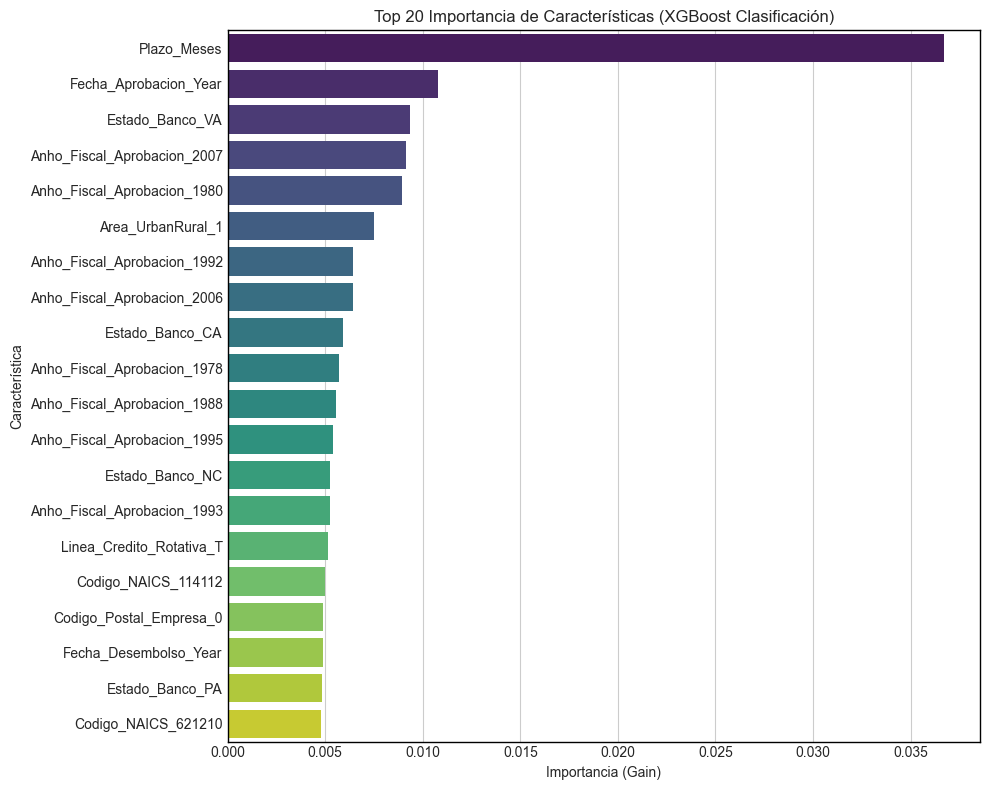


Visualización de la importancia de características completada usando nombres reconstruidos.


In [ ]:
# Celda X+7 o la celda donde visualizas la importancia
# Asegúrate de que 'final_model_pipeline_xgb_cls' esté cargado

import joblib # Asegúrate de importar joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Cargar los Nombres de Características Guardados (MANUALMENTE RECONSTRUIDOS) ---
feature_names_file_cls_manual = 'feature_names_processed_cls_manual.pkl' # <--- ¡NUEVA RUTA!

loaded_feature_names_cls = None # Inicializar a None
try:
    loaded_feature_names_cls = joblib.load(feature_names_file_cls_manual)
    print(f"Cargados {len(loaded_feature_names_cls)} nombres de características desde {feature_names_file_cls_manual}")

except FileNotFoundError:
    print(f"ERROR: Archivo de nombres de características '{feature_names_file_cls_manual}' no encontrado.")
    print("Los gráficos de importancia usarán nombres genéricos (feature_X).")
except Exception as e:
    print(f"ERROR al cargar nombres de características desde '{feature_names_file_cls_manual}': {e}")
    print("Los gráficos de importancia usarán nombres genéricos (feature_X).")


# --- (El resto de tu código de la Celda X+7, si aplica, o la Celda X+8) ---
# Acceder al modelo XGBoost entrenado desde el pipeline
# Esto asume que final_model_pipeline_xgb_cls fue cargado correctamente antes
if 'final_model_pipeline_xgb_cls' in locals() and final_model_pipeline_xgb_cls is not None:
    xgb_model_trained = final_model_pipeline_xgb_cls.named_steps.get('classifier') # <--- Verifica nombre

    if xgb_model_trained is not None and hasattr(xgb_model_trained, 'feature_importances_'):
        importance = xgb_model_trained.feature_importances_

        # --- Obtener los nombres de las características para la visualización ---
        # ¡Usar los nombres cargados si están disponibles y coinciden en tamaño!
        if loaded_feature_names_cls is not None and len(loaded_feature_names_cls) == len(importance):
            feature_names_out = loaded_feature_names_cls
            print("Usando nombres de características cargados exitosamente.")
        else:
            # Fallback a nombres genéricos si la carga falló o no coinciden
            print("No se pudieron usar nombres de características cargados. Usando nombres genéricos (feature_X).")
            feature_names_out = [f'feature_{i}' for i in range(len(importance))]


        # --- Crear DataFrame y Visualizar ---
        # Crear un DataFrame para visualizar la importancia
        importance_df = pd.DataFrame({'Feature': feature_names_out, 'Importance': importance})

        # Ordenar por importancia de forma descendente
        importance_df = importance_df.sort_values('Importance', ascending=False)

        # Mostrar las N características más importantes en una tabla
        n_top_features_table = 10 # Ajusta cuántas quieres mostrar
        print(f"\nTop {n_top_features_table} Características más Importantes (Clasificación):")
        print(importance_df.head(n_top_features_table))


        # Visualizar las N características más importantes en un gráfico
        n_top_features_plot = 20 # <--- Ajusta cuántas quieres mostrar en el gráfico
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(n_top_features_plot), palette='viridis')
        plt.title(f'Top {n_top_features_plot} Importancia de Características (XGBoost Clasificación)')
        plt.xlabel('Importancia (Gain)')
        plt.ylabel('Característica')
        plt.tight_layout() # Ajustar diseño
        plt.show()

        print("\nVisualización de la importancia de características completada usando nombres reconstruidos.")

    else:
        print("\nNo se pudo acceder al estimador XGBoost o su importancia. Verifica el pipeline cargado.")
else:
     print("\nEl pipeline 'final_model_pipeline_xgb_cls' no está cargado. No se puede mostrar la importancia.")

ERROR: Archivo de nombres de características 'feature_names_processed_cls.pkl' no encontrado.
Los gráficos de importancia usarán nombres genéricos (feature_X).

Evaluando el pipeline XGBoost final en el conjunto de prueba...

Métricas de Evaluación en el Conjunto de Prueba:
Accuracy (Global): 0.9395
Precision (Clase 1 - Incumplimiento): 0.7711
Recall (Clase 1 - Incumplimiento): 0.9319
F1-Score (Clase 1 - Incumplimiento): 0.8439
AUC-ROC (Global): 0.9812

Métricas Específicas para la Clase 0 (Pagado):
Precision (Clase 0 - Pagado): 0.9848
Recall (Clase 0 - Pagado / Especificidad): 0.9411
F1-Score (Clase 0 - Pagado): 0.9624

Matriz de Confusión:


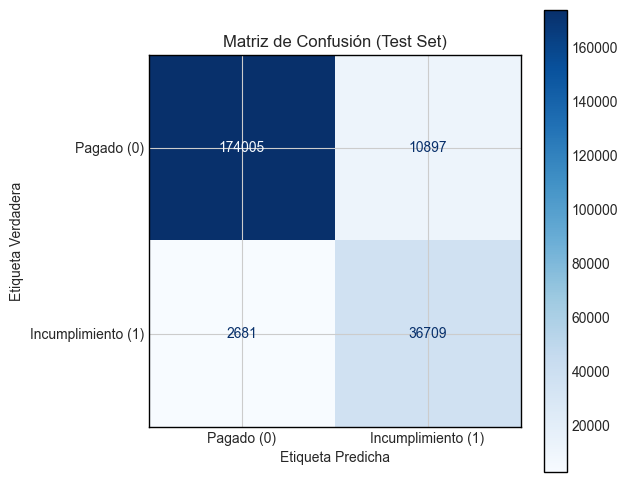


Curva ROC:


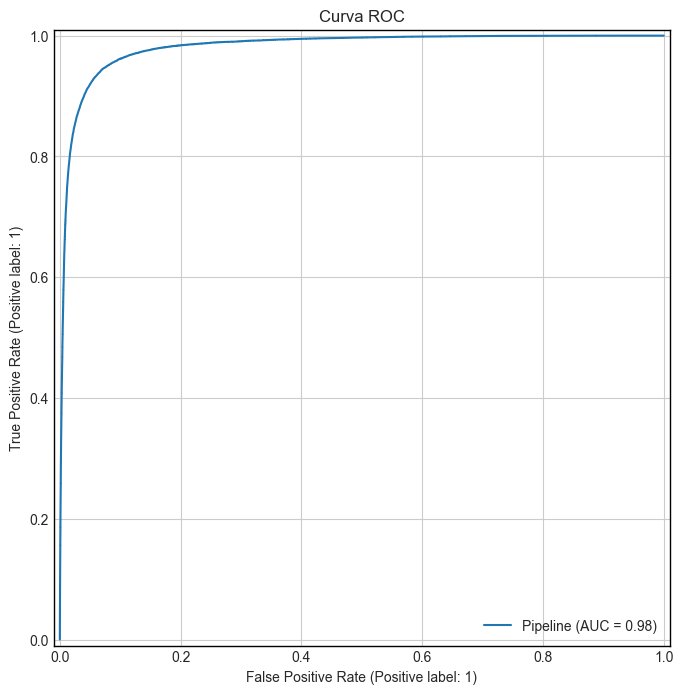


Curva Precision-Recall:


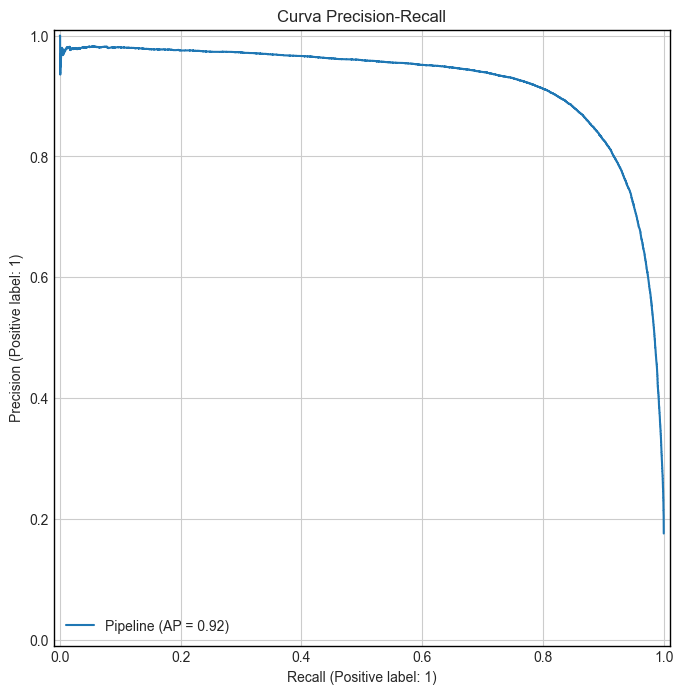

In [ ]:
# Celda X+7: Evaluar el Modelo Final y Mostrar Métricas + Gráficas

# Importar métricas si no están ya
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cargar los Nombres de Características Guardados ---
feature_names_file_cls = 'feature_names_processed_cls.pkl' # <--- ¡Verifica esta ruta!

loaded_feature_names_cls = None # Inicializar a None
try:
    loaded_feature_names_cls = joblib.load(feature_names_file_cls)
    print(f"Cargados {len(loaded_feature_names_cls)} nombres de características desde {feature_names_file_cls}")

except FileNotFoundError:
    print(f"ERROR: Archivo de nombres de características '{feature_names_file_cls}' no encontrado.")
    print("Los gráficos de importancia usarán nombres genéricos (feature_X).")
except Exception as e:
    print(f"ERROR al cargar nombres de características: {e}")
    print("Los gráficos de importancia usarán nombres genéricos (feature_X).")

print("\nEvaluando el pipeline XGBoost final en el conjunto de prueba...")

# Realizar predicciones en el conjunto de prueba
y_pred_cls = final_model_pipeline_xgb_cls.predict(X_test_cls)

# Obtener probabilidades para la clase positiva (Incumplimiento=1)
y_pred_proba_cls = final_model_pipeline_xgb_cls.predict_proba(X_test_cls)[:, 1]

# --- Métricas de Evaluación Globales y para la Clase 1 (Incumplimiento) ---
print("\nMétricas de Evaluación en el Conjunto de Prueba:")

# Precisión (Accuracy):
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"Accuracy (Global): {accuracy:.4f}") # Etiquetamos como Global

# Métricas para la Clase 1 (Incumplimiento):
precision_class_1 = precision_score(y_test_cls, y_pred_cls, pos_label=1)
recall_class_1 = recall_score(y_test_cls, y_pred_cls, pos_label=1)
f1_class_1 = f1_score(y_test_cls, y_pred_cls, pos_label=1)

print(f"Precision (Clase 1 - Incumplimiento): {precision_class_1:.4f}")
print(f"Recall (Clase 1 - Incumplimiento): {recall_class_1:.4f}")
print(f"F1-Score (Clase 1 - Incumplimiento): {f1_class_1:.4f}")

# AUC-ROC (Global):
roc_auc = roc_auc_score(y_test_cls, y_pred_proba_cls)
print(f"AUC-ROC (Global): {roc_auc:.4f}")


# --- Métricas Específicas para la Clase 0 (Pagado) ---
print("\nMétricas Específicas para la Clase 0 (Pagado):")

# Precisión (para Clase 0): De los que predijimos como 0, ¿cuántos fueron 0? (NPV)
# Usamos pos_label=0 para indicar que queremos estas métricas para la clase 0
precision_class_0 = precision_score(y_test_cls, y_pred_cls, pos_label=0)
print(f"Precision (Clase 0 - Pagado): {precision_class_0:.4f}")

# Recall (para Clase 0): De los que fueron realmente 0, ¿cuántos predijimos como 0? (Especificidad o Tasa de Verdaderos Negativos)
# Usamos pos_label=0 para indicar que queremos estas métricas para la clase 0
recall_class_0 = recall_score(y_test_cls, y_pred_cls, pos_label=0)
print(f"Recall (Clase 0 - Pagado / Especificidad): {recall_class_0:.4f}")

# F1-Score (para Clase 0): Balance entre Precision y Recall para la clase 0.
# Usamos pos_label=0
f1_class_0 = f1_score(y_test_cls, y_pred_cls, pos_label=0)
print(f"F1-Score (Clase 0 - Pagado): {f1_class_0:.4f}")


# --- Matriz de Confusión ---
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test_cls, y_pred_cls)
# Usar ConfusionMatrixDisplay para visualizarla con etiquetas claras
# Asegúrate de que las etiquetas correspondan a 0 y 1
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pagado (0)', 'Incumplimiento (1)']) # Etiquetas más descriptivas
fig_cm, ax_cm = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax_cm, cmap='Blues', values_format='d')
plt.title("Matriz de Confusión (Test Set)")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()

# --- Curva ROC ---
print("\nCurva ROC:")
fig_roc, ax_roc = plt.subplots(figsize=(8, 8))
roc_display = RocCurveDisplay.from_estimator(final_model_pipeline_xgb_cls, X_test_cls, y_test_cls, ax=ax_roc)
plt.title('Curva ROC')
plt.grid(True)
plt.show()


# --- Curva Precision-Recall ---
print("\nCurva Precision-Recall:")
fig_pr, ax_pr = plt.subplots(figsize=(8, 8))
pr_display = PrecisionRecallDisplay.from_estimator(final_model_pipeline_xgb_cls, X_test_cls, y_test_cls, ax=ax_pr)
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()

Error al obtener nombres de características del preprocesador: Estimator to_string does not provide get_feature_names_out. Did you mean to call pipeline[:-1].get_feature_names_out()?
Intentando construir nombres de características genéricos.


C:\Users\jamal\AppData\Local\Temp\ipykernel_30104\185184868.py:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




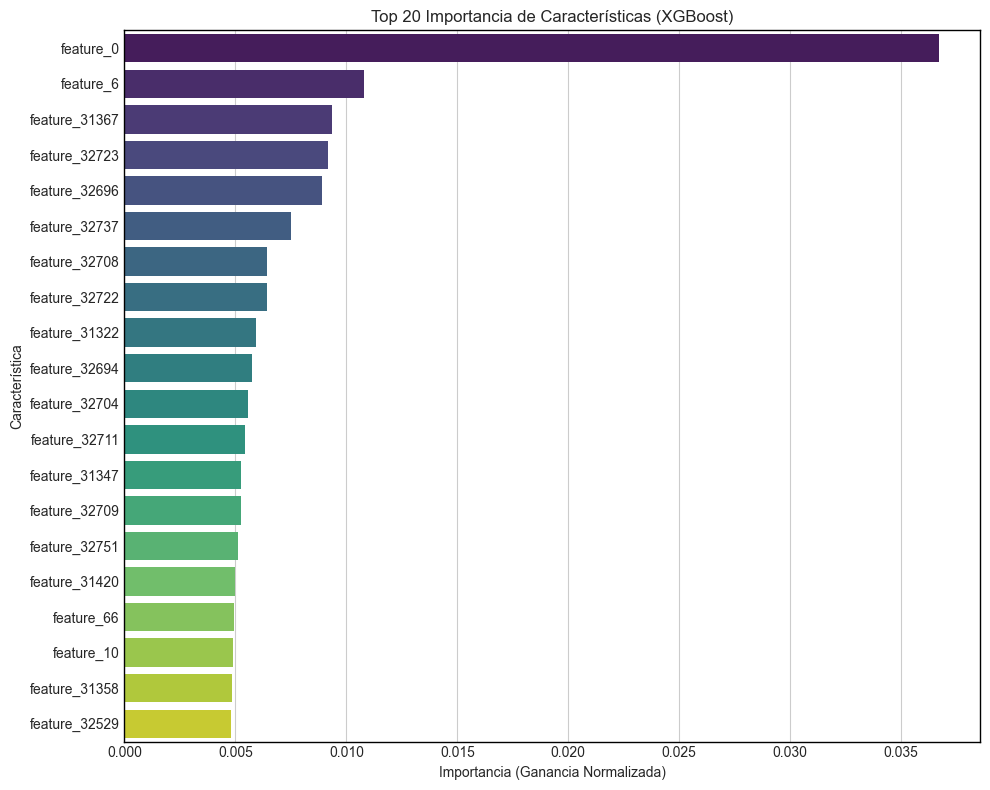


Visualización de la importancia de características completada.


In [ ]:
# Celda X+8: Visualizar Importancia de Características

# Importar librerías si no están ya
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Para crear DataFrame

# Obtener el modelo XGBoost entrenado desde el pipeline
xgb_model_trained = final_model_pipeline_xgb_cls.named_steps['classifier']

# Obtener el preprocesador entrenado desde el pipeline
preprocessor_trained = final_model_pipeline_xgb_cls.named_steps['preprocessor']

# Obtener la importancia de las características
importance = xgb_model_trained.feature_importances_

# Obtener los nombres de las características después del preprocesamiento
# Usamos get_feature_names_out() del ColumnTransformer
try:
    feature_names_out = preprocessor_trained.get_feature_names_out()
except Exception as e:
    print(f"Error al obtener nombres de características del preprocesador: {e}")
    # Si falla, intentar construir nombres genéricos o usar los originales si es posible
    # Esto puede no ser preciso si hay One-Hot Encoding
    print("Intentando construir nombres de características genéricos.")
    # El número de características después del CT es la longitud de 'importance'
    feature_names_out = [f'feature_{i}' for i in range(len(importance))]


# Crear un DataFrame para visualizar la importancia
importance_df = pd.DataFrame({'Feature': feature_names_out, 'Importance': importance})

# Ordenar por importancia de forma descendente
importance_df = importance_df.sort_values('Importance', ascending=False)

# Mostrar las N características más importantes
n_top_features_importance = 20 # Ajusta cuántas quieres mostrar

plt.figure(figsize=(10, 8))
# Usar sns.barplot para visualizar las top N características
sns.barplot(x='Importance', y='Feature', data=importance_df.head(n_top_features_importance), palette='viridis')
plt.title(f'Top {n_top_features_importance} Importancia de Características (XGBoost)')
plt.xlabel('Importancia (Ganancia Normalizada)') # XGBoost usa 'gain' por defecto para feature_importances
plt.ylabel('Característica')
plt.tight_layout() # Ajustar diseño para evitar que las etiquetas se solapen
plt.show()

print("\nVisualización de la importancia de características completada.")

In [ ]:
# Celda Y+3: Gráfico de Importancia de Parámetros

import optuna.visualization as ov

# Asegúrate de que study_xgb_cls está definido y la optimización ya se ejecutó
if 'study_xgb_cls' in locals() and study_xgb_cls is not None:
    print("\nGenerando gráfico de importancia de parámetros...")
    try:
        fig = ov.plot_param_importances(study_xgb_cls)
        fig.update_layout(title="Importancia de los Hiperparámetros en la Optimización")
        fig.show()
        print("Gráfico de importancia de parámetros generado.")
    except Exception as e:
        print(f"Error al generar el gráfico de importancia de parámetros: {e}")
        print("Asegúrate de que el estudio tiene al menos 2 trials para calcular la importancia.") # Se necesitan al menos 2 trials
else:
    print("El estudio de Optuna no está definido o no se ha ejecutado.")


Generando gráfico de importancia de parámetros...


Gráfico de importancia de parámetros generado.


In [ ]:
# Celda Y+4: Gráficos de Slice para Parámetros Clave (CORREGIDA)

import optuna.visualization as ov
import optuna.importance # Importar el módulo correcto para calcular importancia

# Asegúrate de que study_xgb_cls está definido y la optimización ya se ejecutó
if 'study_xgb_cls' in locals() and study_xgb_cls is not None:
    print("\nGenerando Gráficos de Slice para Parámetros Clave...")

    try:
        # --- CORRECTO: Obtener los nombres de los parámetros más importantes ---
        # Usar optuna.importance.get_param_importances para obtener el dict ordenado
        print("Calculando importancia de parámetros para seleccionar los claves...")
        param_importances = optuna.importance.get_param_importances(study_xgb_cls)

        # Tomar los nombres de los N parámetros más importantes (ej. top 5 o 7)
        top_n = 7 # <--- Ajusta cuántos parámetros clave quieres mostrar
        top_n_params_names = list(param_importances.keys())[:top_n] # Obtiene los nombres de las claves del diccionario ordenado

        if not top_n_params_names:
             print("No se encontraron parámetros importantes o la lista de nombres está vacía.")
        else:
            print(f"Generando Slice Plots para los siguientes parámetros (Top {top_n}): {', '.join(top_n_params_names)}")
            for param_name in top_n_params_names:
                 # Genera el gráfico de slice para cada parámetro en la lista
                 print(f" Generando slice plot para: {param_name}...")
                 fig = ov.plot_slice(study_xgb_cls, params=[param_name]) # params=[...] lista de parámetros a incluir
                 fig.update_layout(title=f"Slice Plot: AUC vs. {param_name}")
                 fig.show()

            print("Generación de Slice Plots completada.")

    except Exception as e:
        print(f"Error al generar los Slice Plots: {e}")
        print("Detalle del error: ", e) # Imprimir detalle del error
        print("Asegúrate de que los nombres de parámetros listados existen en el estudio de Optuna y que hay suficientes trials (>1).")

else:
    print("El estudio de Optuna no está definido o no se ha ejecutado.")


Generando Gráficos de Slice para Parámetros Clave...
Calculando importancia de parámetros para seleccionar los claves...
Generando Slice Plots para los siguientes parámetros (Top 7): reg_lambda, n_estimators, subsample, max_depth, gamma, learning_rate, colsample_bytree
 Generando slice plot para: reg_lambda...


 Generando slice plot para: n_estimators...


 Generando slice plot para: subsample...


 Generando slice plot para: max_depth...


 Generando slice plot para: gamma...


 Generando slice plot para: learning_rate...


 Generando slice plot para: colsample_bytree...


Generación de Slice Plots completada.


In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegúrate de tener todas las clases personalizadas necesarias definidas (como to_string_func)
# ... (definición de to_string_func si la usaste en tu pipeline) ...

# Define la ruta a tu modelo de clasificación
classification_model_path = 'final_model_pipeline_xgb_cls.pkl' 

try:
    # Cargar el modelo de CLASIFICACIÓN optimizado
    model_clasificacion = joblib.load(classification_model_path)
    print(f"Modelo de clasificación cargado correctamente desde {classification_model_path}")

    # Identificar los pasos del pipeline
    if isinstance(model_clasificacion, Pipeline):
         # Asumiendo nombres estándar 'preprocessor' y 'classifier' o 'xgb_classifier'
         preprocessor_cls = model_clasificacion.named_steps.get('preprocessor') # <--- Verifica este nombre
         classifier_xgb = None
         for name, step in model_clasificacion.named_steps.items():
             if isinstance(step, (xgb.XGBClassifier, xgb.XGBRegressor)): # Acepta ambos tipos de xgb
                 classifier_xgb = step
                 xgb_step_name = name # Guarda el nombre del paso XGBoost
                 break # Asume que el primer XGBoost es el final

         if preprocessor_cls is None:
              print("Advertencia: No se encontró un paso 'preprocessor' en el pipeline de clasificación.")
         if classifier_xgb is None:
              print("Error: No se encontró un estimador XGBoost en el pipeline de clasificación.")
              # model_clasificacion = None # Podrías invalidar la variable si falla crítico

    else:
        print("El objeto cargado no parece ser un pipeline de scikit-learn.")
        preprocessor_cls = None
        classifier_xgb = None # Invalida si no es pipeline

except FileNotFoundError:
    print(f"¡Error al cargar el archivo del modelo de clasificación! Asegúrate de que '{classification_model_path}' esté en el directorio correcto.")
    model_clasificacion = None
    preprocessor_cls = None
    classifier_xgb = None
except Exception as e:
    print(f"Error inesperado al cargar el modelo de clasificación: {e}")
    model_clasificacion = None
    preprocessor_cls = None
    classifier_xgb = None

# Verifica si el modelo y los pasos clave se cargaron
if model_clasificacion is None or classifier_xgb is None:
     print("\nEl modelo de clasificación o sus pasos clave no se cargaron correctamente. No se puede proceder con la importancia de características.")

Modelo de clasificación cargado correctamente desde final_model_pipeline_xgb_cls.pkl


In [ ]:
# Celda X+9: Guardar el Pipeline del Modelo Clasificación Final

import joblib

# Guardar el pipeline completo
joblib.dump(final_model_pipeline_xgb_cls, 'final_model_pipeline_xgb_cls.pkl')

print("\nPipeline del modelo de clasificación final guardado como 'final_model_pipeline_xgb_cls.pkl'")


Pipeline del modelo de clasificación final guardado como 'final_model_pipeline_xgb_cls.pkl'


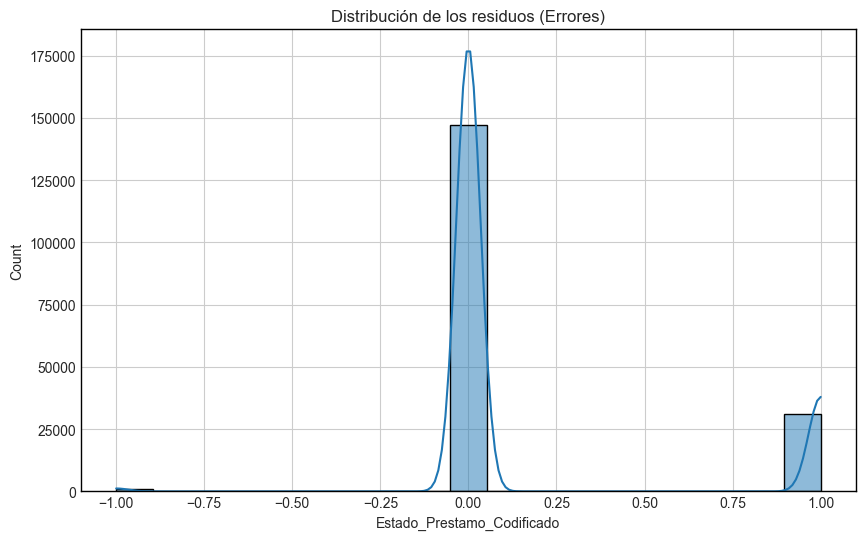

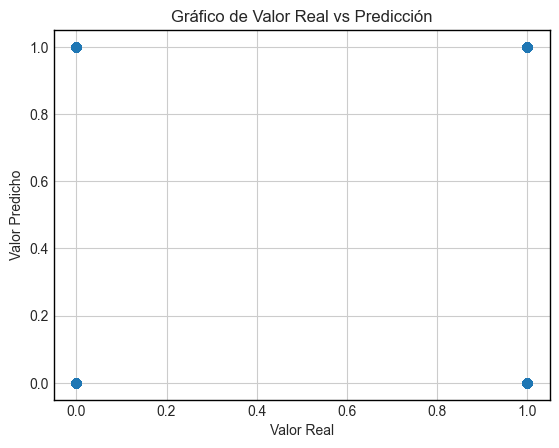

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribución de los residuos (Errores)')
plt.show()

# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Gráfico de Valor Real vs Predicción')
plt.show()


In [ ]:
# Importar librerías para segmentación
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns # Para visualización

# Asegúrate de que el DataFrame df original esté cargado (Celda 2)
# Asegúrate de que pd, np estén importados (Celda 1)

print("Librerías para segmentación importadas.")

Librerías para segmentación importadas.


In [ ]:
df['Fecha_Aprobacion'] = pd.to_datetime(df['Fecha_Aprobacion'], errors='coerce')
df['ApprovalYear'] = df['Fecha_Aprobacion'].dt.year


In [ ]:
# Seleccionar características para la segmentación
segmentation_features = [
    'Estado_Empresa',
    'Codigo_Postal_Empresa',
    'Estado_Banco',
    'Codigo_NAICS',
    'Anho_Fiscal_Aprobacion', # Usar el año fiscal como categórica o numérica?
    'Plazo_Meses',
    'Numero_Empleados',
    'Negocio_Existente',
    'Empleos_Creados',
    'Empleos_Retenidos',
    'Codigo_Franquicia',
    'Area_UrbanRural',
    'Linea_Credito_Rotativa',
    'Programa_LowDoc',
    'Monto_Aprobado_Banco',
    'Monto_Aprobado_SBA',
    'ApprovalYear' # Usar el año calendario también?
]

# Crear un DataFrame con las características seleccionadas
df_segmentation = df[segmentation_features].copy()

# Vamos a tratar Anho_Fiscal_Aprobacion y ApprovalYear como numéricas después de convertir a int
# Y Codigo_Postal_Empresa, Codigo_NAICS, Codigo_Franquicia como categóricas por ahora
# aunque su alta cardinalidad podría ser un problema para el OHE y K-Means.
# Si hay problemas, podríamos simplificar NAICS/Franquicia (ej. usar solo los primeros dígitos).

# Convertir columnas numéricas que puedan ser object o tener NaNs
# Anho_Fiscal_Aprobacion a menudo puede venir como object. Convertir a numérico si es posible.
df_segmentation['Anho_Fiscal_Aprobacion'] = pd.to_numeric(df_segmentation['Anho_Fiscal_Aprobacion'], errors='coerce')
# ApprovalYear ya era int32

# Identificar columnas por tipo para el preprocesamiento de segmentación
# Excluimos las fechas datetime originales si aún estuvieran.
numerical_cols_seg = df_segmentation.select_dtypes(include=np.number).columns.tolist()
# Asegurarnos de que los códigos (Postal, NAICS, Franquicia) sean tratados como categóricos AQUI
categorical_cols_seg = ['Estado_Empresa', 'Estado_Banco', 'Negocio_Existente',
                        'Area_UrbanRural', 'Linea_Credito_Rotativa', 'Programa_LowDoc',
                        'Codigo_NAICS', 'Codigo_Franquicia', 'Anho_Fiscal_Aprobacion'] # Tratar Fiscal Year como categórico si tiene formato FYxxxx o solo hay unos pocos años

# Ajustar listas de columnas: Postal, NAICS, Franquicia, Anho_Fiscal_Aprobacion son categóricas para OHE
numerical_cols_seg = [col for col in numerical_cols_seg if col not in ['Codigo_Postal_Empresa', 'Codigo_NAICS', 'Codigo_Franquicia', 'Anho_Fiscal_Aprobacion', 'ApprovalYear']]
categorical_cols_seg.extend(['Codigo_Postal_Empresa', 'Codigo_NAICS', 'Codigo_Franquicia'])
categorical_cols_seg = list(set(categorical_cols_seg)) # Eliminar duplicados

# Asegurarnos de que ApprovalYear se queda como numérica
numerical_cols_seg.append('ApprovalYear')

# Manejo de valores nulos antes del preprocesamiento
# Optaremos por imputar nulos en numéricas con la mediana y en categóricas con la moda
for col in numerical_cols_seg:
    if df_segmentation[col].isnull().any():
        median_val = df_segmentation[col].median()
        df_segmentation[col].fillna(median_val, inplace=True)

for col in categorical_cols_seg:
     # Convertir a string para asegurar que OneHotEncoder no falle con tipos mixtos o numéricos
     df_segmentation[col] = df_segmentation[col].astype(str)
     if df_segmentation[col].isnull().any():
          mode_val = df_segmentation[col].mode()[0] # mode() puede retornar múltiples si hay empate
          df_segmentation[col].fillna(mode_val, inplace=True)


# Crear preprocesador para segmentación
# Numéricas: Imputar (si no lo hicimos ya) y Escalar
# Categóricas: Imputar (si no lo hicimos ya) y One-Hot Encode
preprocessor_segmentation = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_seg), # Escalar numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_seg) # One-Hot Encode categóricas
    ],
    remainder='passthrough' # No debería haber columnas restantes si seleccionamos todo
)

print("\nCaracterísticas para segmentación seleccionadas y preprocesador definido.")
print(f"Columnas numéricas a escalar: {numerical_cols_seg}")
print(f"Columnas categóricas a codificar: {categorical_cols_seg}")

# Aplicar el preprocesamiento
X_segmentation = preprocessor_segmentation.fit_transform(df_segmentation)

print(f"\nShape de los datos después del preprocesamiento: {X_segmentation.shape}")


Características para segmentación seleccionadas y preprocesador definido.
Columnas numéricas a escalar: ['Plazo_Meses', 'Numero_Empleados', 'Empleos_Creados', 'Empleos_Retenidos', 'Monto_Aprobado_Banco', 'Monto_Aprobado_SBA', 'ApprovalYear']
Columnas categóricas a codificar: ['Negocio_Existente', 'Codigo_NAICS', 'Estado_Empresa', 'Linea_Credito_Rotativa', 'Anho_Fiscal_Aprobacion', 'Codigo_Postal_Empresa', 'Estado_Banco', 'Programa_LowDoc', 'Codigo_Franquicia', 'Area_UrbanRural']

Shape de los datos después del preprocesamiento: (897167, 35114)


In [ ]:
print(df.columns.tolist())


['ID_Prestamo', 'Nombre_Empresa', 'Ciudad_Empresa', 'Estado_Empresa', 'Codigo_Postal_Empresa', 'Nombre_Banco', 'Estado_Banco', 'Codigo_NAICS', 'Fecha_Aprobacion', 'Anho_Fiscal_Aprobacion', 'Plazo_Meses', 'Numero_Empleados', 'Negocio_Existente', 'Empleos_Creados', 'Empleos_Retenidos', 'Codigo_Franquicia', 'Area_UrbanRural', 'Linea_Credito_Rotativa', 'Programa_LowDoc', 'Fecha_Incumplimiento', 'Fecha_Desembolso', 'Monto_Desembolsado', 'Monto_Adeudado', 'Estado_Prestamo', 'Monto_Incumplimiento', 'Monto_Aprobado_Banco', 'Monto_Aprobado_SBA', 'Estado_Prestamo_Codificado', 'ApprovalYear', 'Segmento_Cliente']


In [ ]:
# Suponiendo que tu DataFrame original se llama df
# Esto toma una muestra aleatoria de 5000 filas
df_muestra_original = df.sample(n=5000, random_state=42) # Usar random_state para reproducibilidad

# Luego guardas esta muestra en un archivo
df_muestra_original.to_parquet('tu_muestra_datos_originales.parquet') # O a CSV, JSON, etc.

In [ ]:
# Elige el número óptimo de segmentos (K) basándote en los gráficos anteriores
optimal_k = 4 # <-- ¡AJUSTA ESTE VALOR BASÁNDOTE EN TU ANÁLISIS VISUAL!

# Entrenar el modelo K-Means final con el K óptimo
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto', max_iter=300)
kmeans_final.fit(X_segmentation)

# Añadir las etiquetas de segmento al DataFrame original
df['Segmento_Cliente'] = kmeans_final.labels_

print(f"\nSegmentación completada con K = {optimal_k}.")
print("Se ha añadido la columna 'Segmento_Cliente' al DataFrame original.")

# --- Interpretar los segmentos ---
print("\nCaracterísticas promedio de cada segmento:")

# Para interpretar, agrupamos por el nuevo Segmento_Cliente
# y calculamos la media de las características originales (antes del escalado/OHE)
# O podemos ver la media de las características *después* del escalado si es más fácil de comparar
# Vamos a usar el DataFrame original df_segmentation (con nulos imputados) para ver promedios interpretables

# Añadir las etiquetas también a df_segmentation para el análisis
df_segmentation['Segmento_Cliente'] = kmeans_final.labels_

# Calcular la media de las características numéricas por segmento
print("\nMedias numéricas por segmento:")
numeric_summary = df_segmentation.groupby('Segmento_Cliente')[numerical_cols_seg].mean()
print(numeric_summary)

# Para las categóricas, podemos ver las frecuencias o la moda por segmento
print("\nDistribución de características categóricas por segmento:")
for col in categorical_cols_seg:
    print(f"\nDistribución para '{col}':")
    print(df_segmentation.groupby('Segmento_Cliente')[col].value_counts(normalize=True).unstack(fill_value=0)) # Frecuencia relativa por segmento

# También puedes ver el tamaño de cada segmento
print("\nTamaño de cada segmento:")
print(df['Segmento_Cliente'].value_counts().sort_index())

# Opcional: Guardar el DataFrame con la nueva columna de segmento
# df.to_parquet('tu_dataset_segmentado.parquet')


Segmentación completada con K = 4.
Se ha añadido la columna 'Segmento_Cliente' al DataFrame original.

Características promedio de cada segmento:

Medias numéricas por segmento:
                  Plazo_Meses  Numero_Empleados  Empleos_Creados  \
Segmento_Cliente                                                   
0                  206.944563         41.924785         7.425960   
1                   85.841624         10.978481         0.191558   
2                   70.539451          6.752969         1.823927   
3                  245.660760         15.562766        43.484907   

                  Empleos_Retenidos  Monto_Aprobado_Banco  Monto_Aprobado_SBA  \
Segmento_Cliente                                                                
0                         11.862871          1.044390e+06       828326.122539   
1                          0.318492          1.220545e+05        97824.417364   
2                          5.294430          8.478495e+04        56900.572582   
3      

In [ ]:
# Después de ejecutar Celda 24 en tu notebook:

# Guardar el modelo K-Means y su preprocesador
import joblib
joblib.dump(kmeans_final, 'kmeans_final.pkl')
joblib.dump(preprocessor_segmentation, 'preprocessor_segmentation.pkl')

# Guardar el resumen numérico de los segmentos
# Asegúrate de que numeric_summary sea el DataFrame que obtuviste de .groupby().mean()
numeric_summary.to_csv('segment_numeric_summary.csv')

# Opcional: Guardar una muestra del DF original *con las etiquetas de segmento añadidas*
# Esto puede ser útil para explorar características categóricas por segmento en la app
# Asegúrate de que 'Segmento_Cliente' ya se haya añadido a df en Celda 24
# df_sample_with_segments = df.sample(n=5000, random_state=42) # Tamaño de muestra para el DF con segmentos
# df_sample_with_segments.to_parquet('df_sample_with_segments.parquet') # O .csv

print("Archivos para la aplicación Streamlit guardados.")

Archivos para la aplicación Streamlit guardados.


In [ ]:
# Celda 22: Seleccionar y Preparar Características para Segmentación

# Seleccionar características para la segmentación
# Incluimos características disponibles en el momento de la aprobación o que describen el préstamo/negocio
segmentation_features = [
    'Estado_Empresa',
    'Codigo_Postal_Empresa',
    'Estado_Banco',
    'Codigo_NAICS',
    'Anho_Fiscal_Aprobacion', # Usar el año fiscal
    'Plazo_Meses',
    'Numero_Empleados',
    'Negocio_Existente', # 1 = Existente, 2 = Nuevo
    'Empleos_Creados',
    'Empleos_Retenidos',
    'Codigo_Franquicia', # 00000 o 00001 si no es franquicia
    'Area_UrbanRural', # 1=Urbana, 2=Rural, 0=Indefinido
    'Linea_Credito_Rotativa', # 'Y'/'N'
    'Programa_LowDoc', # 'Y'/'N'
    'Monto_Aprobado_Banco',
    'Monto_Aprobado_SBA', # Incluimos montos aprobados ya que caracterizan el tipo de préstamo
    'ApprovalYear' # Año calendario de aprobación
]

# Crear un DataFrame solo con las características seleccionadas
df_segmentation = df[segmentation_features].copy()

# --- Preprocesamiento de datos para K-Means ---
# K-Means es sensible a la escala de los datos numéricos y requiere datos numéricos.
# 1. Manejar nulos: Imputaremos (usando SimpleImputer).
# 2. Escalar numéricas: Usaremos StandardScaler.
# 3. Codificar categóricas: Usaremos OneHotEncoder.

# Identificar columnas numéricas y categóricas en el DataFrame de segmentación
# Necesitamos decidir cómo tratar Codigo_Postal, NAICS, Franquicia, Anho_Fiscal_Aprobacion, ApprovalYear, Negocio_Existente, Area_UrbanRural
# Generalmente, códigos (Postal, NAICS, Franq) y años (Fiscal, ApprovalYear), Negocio_Existente, Area_UrbanRural se tratan como categóricas si no tienen un significado numérico directo relevante para la distancia en el clustering.
# Plazo, Empleados, Empleos, Montos son claramente numéricas.
# Linea_Credito_Rotativa, Programa_LowDoc, Estado_Empresa, Estado_Banco son categóricas.

numerical_cols_seg = ['Plazo_Meses', 'Numero_Empleados', 'Empleos_Creados', 'Empleos_Retenidos',
                      'Monto_Aprobado_Banco', 'Monto_Aprobado_SBA']

# Codigo_Postal, NAICS, Franquicia pueden tener muy alta cardinalidad. OHE directo podría crear muchísimas columnas.
# Para segmentación, podrías considerar usar solo los primeros dígitos de NAICS/Postal o agrupar franquicias raras si causa problemas.
# Por ahora, tratémoslas como categóricas estándar, pero ten en cuenta la alta dimensionalidad resultante.
categorical_cols_seg = ['Estado_Empresa', 'Estado_Banco', 'Negocio_Existente', 'Area_UrbanRural',
                        'Linea_Credito_Rotativa', 'Programa_LowDoc',
                        'Codigo_Postal_Empresa', 'Codigo_NAICS', 'Codigo_Franquicia',
                        'Anho_Fiscal_Aprobacion', 'ApprovalYear'] # Incluir códigos y años como categóricas


# Asegurarnos de que las columnas categóricas sean tipo object/string para el OneHotEncoder
for col in categorical_cols_seg:
    if col in df_segmentation.columns:
        df_segmentation[col] = df_segmentation[col].astype(str) # Convertir a string para OHE


# Crear el preprocesador usando ColumnTransformer
# Aplicará diferentes pasos a las columnas numéricas y categóricas
# Imputaremos antes de escalar/codificar
preprocessor_segmentation = ColumnTransformer(
    transformers=[
        # Para columnas numéricas: Imputar con la mediana, luego escalar
        ('num', Pipeline([('imputer', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]), numerical_cols_seg),

        # Para columnas categóricas: Imputar con la moda, luego One-Hot Encode
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                           ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols_seg)
    ],
    remainder='passthrough' # Asegurarse de que no haya columnas sin procesar (deberían ser todas seleccionadas)
)

# Ajustar y transformar los datos de segmentación
X_segmentation = preprocessor_segmentation.fit_transform(df_segmentation)

print("\nCaracterísticas para segmentación seleccionadas y preprocesador ajustado y aplicado.")
print(f"Columnas numéricas: {numerical_cols_seg}")
print(f"Columnas categóricas: {categorical_cols_seg}")
print(f"Shape de los datos después del preprocesamiento: {X_segmentation.shape}")


Características para segmentación seleccionadas y preprocesador ajustado y aplicado.
Columnas numéricas: ['Plazo_Meses', 'Numero_Empleados', 'Empleos_Creados', 'Empleos_Retenidos', 'Monto_Aprobado_Banco', 'Monto_Aprobado_SBA']
Columnas categóricas: ['Estado_Empresa', 'Estado_Banco', 'Negocio_Existente', 'Area_UrbanRural', 'Linea_Credito_Rotativa', 'Programa_LowDoc', 'Codigo_Postal_Empresa', 'Codigo_NAICS', 'Codigo_Franquicia', 'Anho_Fiscal_Aprobacion', 'ApprovalYear']
Shape de los datos después del preprocesamiento: (897167, 35161)


Preparando análisis para determinar el número óptimo de segmentos (K).

Calculando inercia y coeficiente de silueta para K en [2, 3, 4, 5, 6, 7, 8, 9, 10] (usando una muestra para acelerar)...
Usando una muestra de 80000 filas de datos preprocesados para calcular métricas de K.
K=2 completado. Inercia (muestra): 968791.35. Silueta (muestra): 0.2152
K=3 completado. Inercia (muestra): 787542.89. Silueta (muestra): 0.2044
K=4 completado. Inercia (muestra): 759704.21. Silueta (muestra): 0.0678
K=5 completado. Inercia (muestra): 708744.31. Silueta (muestra): 0.0696
K=6 completado. Inercia (muestra): 661489.18. Silueta (muestra): 0.0783
K=7 completado. Inercia (muestra): 633162.39. Silueta (muestra): 0.0783
K=8 completado. Inercia (muestra): 659182.33. Silueta (muestra): 0.0667
K=9 completado. Inercia (muestra): 608437.82. Silueta (muestra): 0.0675
K=10 completado. Inercia (muestra): 601647.84. Silueta (muestra): 0.0642


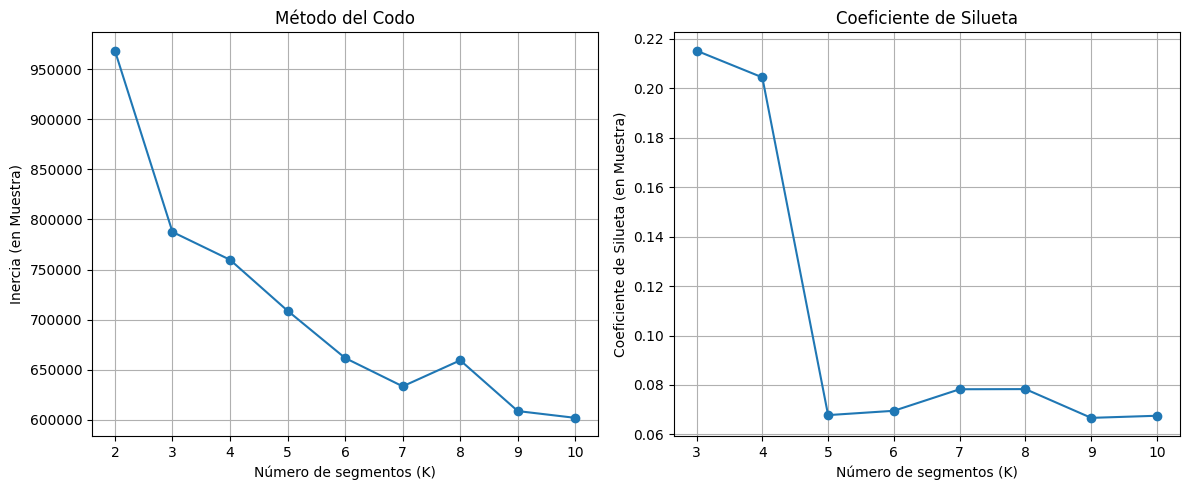


Análisis del método del codo y silueta (en muestra) completado. Revisa los gráficos para elegir un valor de K.


In [ ]:
# Celda 23: Determinar el Número Óptimo de Segmentos (Acelerado con Muestra)

# Importar librerías si no están ya
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # Para pd.DataFrame / pd.Series

# Asegúrate de que X_segmentation esté disponible desde la Celda 22
print("Preparando análisis para determinar el número óptimo de segmentos (K).")


# Rango de valores de K a probar
k_range = range(2, 11) # Puedes ajustar este rango (ej. range(2, 15) si quieres probar más)

inertia = []
silhouette_scores = []

print(f"\nCalculando inercia y coeficiente de silueta para K en {list(k_range)} (usando una muestra para acelerar)...")

# --- Paso Aceleración: Usar una muestra de X_segmentation para calcular inercia/silueta ---
# Define el tamaño de la muestra. Unas pocas decenas de miles suelen ser suficientes para este análisis.
# Ajusta sample_size_for_k_tuning según tus recursos y el tamaño total de X_segmentation
sample_size_for_k_tuning = 80000 # <-- AJUSTA ESTE TAMAÑO DE MUESTRA (ej. 50000, 80000, 100000)

if X_segmentation.shape[0] > sample_size_for_k_tuning:
    # Tomar una muestra aleatoria de los datos preprocesados
    # Usamos np.random.choice para obtener índices aleatorios de forma reproducible
    sample_indices = np.random.choice(X_segmentation.shape[0], size=sample_size_for_k_tuning, replace=False)

    # Si X_segmentation es una matriz SciPy sparse (común después de OHE), usa indexación de SciPy
    if hasattr(X_segmentation, 'tocsr'):
         X_segmentation_sample = X_segmentation[sample_indices, :]
    # Si es un array NumPy denso o DataFrame
    elif isinstance(X_segmentation, (np.ndarray, pd.DataFrame)):
         X_segmentation_sample = X_segmentation[sample_indices]
    else:
         # Fallback o manejo para otros tipos si es necesario
         print("Tipo de datos de X_segmentation no reconocido para muestreo directo. Usando todos los datos para métricas de K.")
         X_segmentation_sample = X_segmentation # Usar todos los datos si el muestreo falla

    if X_segmentation_sample.shape[0] < X_segmentation.shape[0]:
        print(f"Usando una muestra de {X_segmentation_sample.shape[0]} filas de datos preprocesados para calcular métricas de K.")
    else:
         print("El dataset preprocesado es igual o menor que el tamaño de muestra solicitado, usando todos los datos.")


else:
    X_segmentation_sample = X_segmentation
    print("El dataset preprocesado es lo suficientemente pequeño, usando todos los datos para calcular métricas de K.")
# --- Fin Paso Aceleración ---

# Asegurarse de que el número de muestras sea al menos K para poder calcular inercia/silueta
min_samples_required = max(k_range) # Necesitas al menos el máximo K samples para el último cálculo
if X_segmentation_sample.shape[0] < min_samples_required:
     print(f"\nADVERTENCIA: El tamaño de la muestra ({X_segmentation_sample.shape[0]}) es menor que el máximo K a probar ({min_samples_required}).")
     print("Algunos cálculos de inercia/silueta para valores altos de K pueden fallar o saltarse.")


for k in k_range:
    # Inicializar y entrenar el modelo K-Means en la MUESTRA
    # n_init='auto' recomendado para elegir el mejor entre múltiples inicializaciones (>=10 por defecto)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', max_iter=300)

    # Asegurarse de que la muestra tenga suficientes puntos para entrenar K-Means para este K
    if X_segmentation_sample.shape[0] < k:
        print(f"Saltando K={k}: Tamaño de muestra insuficiente ({X_segmentation_sample.shape[0]} < {k})")
        inertia.append(np.nan)
        if k > 1: silhouette_scores.append(np.nan)
        continue # Pasar al siguiente K

    try:
        kmeans.fit(X_segmentation_sample) # <-- ¡Entrenar en la MUESTRA!
        inertia.append(kmeans.inertia_) # Guardar la inercia

        # Calcular el coeficiente de silueta en la MUESTRA (solo si k > 1 y hay suficientes muestras)
        if k > 1:
            # La silueta requiere al menos 2 clusters y un tamaño de muestra mayor que el número de clusters
            if X_segmentation_sample.shape[0] > k:
                 silhouette_avg = silhouette_score(X_segmentation_sample, kmeans.labels_)
                 silhouette_scores.append(silhouette_avg)
                 print(f"K={k} completado. Inercia (muestra): {kmeans.inertia_:.2f}. Silueta (muestra): {silhouette_avg:.4f}") # Mostrar más decimales para silueta
            else:
                 silhouette_scores.append(np.nan)
                 print(f"K={k} completado. Inercia (muestra): {kmeans.inertia_:.2f}. Silueta (muestra): No calculado (muestras <= K)")
        else: # K=1, no se calcula silueta
             inertia.append(kmeans.inertia_) # Asegurarse de añadir inercia para K=1
             print(f"K={k} completado. Inercia (muestra): {kmeans.inertia_:.2f}")

    except Exception as e:
         print(f"Error al ejecutar K-Means o Silueta para K={k}: {e}")
         # Asegurarse de que ambas listas mantengan la misma longitud si se añade NaN
         inertia.append(np.nan)
         if k > 1 and len(silhouette_scores) < len([k_val for k_val in k_range if k_val > 1]):
             silhouette_scores.append(np.nan)


# Visualizar el método del codo (Este código está bien, incluye el filtro para NaNs)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# Eliminar NaNs para el plot si hubo errores/saltos
inertia_plot = [i for i in inertia if not np.isnan(i)]
# Asegurarse de que los k correspondientes también se usen para el plot
k_range_plot_inertia = [k for i, k in zip(inertia, k_range) if not np.isnan(i)] # Filtra k en paralelo con inertia
if k_range_plot_inertia:
    plt.plot(k_range_plot_inertia, inertia_plot, marker='o')
    plt.xlabel("Número de segmentos (K)")
    plt.ylabel("Inercia (en Muestra)")
    plt.title("Método del Codo")
    plt.xticks(k_range_plot_inertia) # Usar los K filtrados como xticks
    plt.grid(True)
else:
    plt.title("Método del Codo (Datos Insuficientes)") # Mensaje si no hay datos para plotear

# --- INICIO DE MODIFICACIÓN: Corregir el Gráfico del Coeficiente de Silueta ---

plt.subplot(1, 2, 2)

# silhouette_scores list corresponde a k_range[1:] (k=2, 3, ..., 10)
k_values_for_silhouette = list(k_range)[1:] # Obtener la lista de valores K para los que SÍ se calculó silueta (desde K=2)

# Combinar los valores K y los scores de silueta, filtrando *pares* donde el score es NaN
# Usamos zip() para emparejar k y score, y filtramos los pares
valid_silhouette_data = [(k, score) for k, score in zip(k_values_for_silhouette, silhouette_scores) if not np.isnan(score)]

# Separar en dos listas para el plot SÓLO si hay datos válidos para plotear
if valid_silhouette_data:
    k_range_silueta_plot = [k for k, score in valid_silhouette_data] # Lista de K válidos
    silhouette_scores_plot = [score for k, score in valid_silhouette_data] # Lista de scores válidos

    # Ahora, realizar el plot con las dos listas de igual longitud
    plt.plot(k_range_silueta_plot, silhouette_scores_plot, marker='o')
    plt.xlabel("Número de segmentos (K)")
    plt.ylabel("Coeficiente de Silueta (en Muestra)")
    plt.title("Coeficiente de Silueta")
    # Asegurarse de que los xticks solo muestren los K para los que hay score válido
    plt.xticks(k_range_silueta_plot)
    plt.grid(True)

else:
    # Si no hay datos de silueta válidos para plotear después de filtrar
    plt.title("Coeficiente de Silueta (Datos Insuficientes)")
    print("\nNo hay suficientes valores de K (>1) con muestras > K y resultados válidos para mostrar el gráfico de silueta.")

# --- FIN DE MODIFICACIÓN ---

plt.tight_layout()
plt.show()

print("\nAnálisis del método del codo y silueta (en muestra) completado. Revisa los gráficos para elegir un valor de K.")

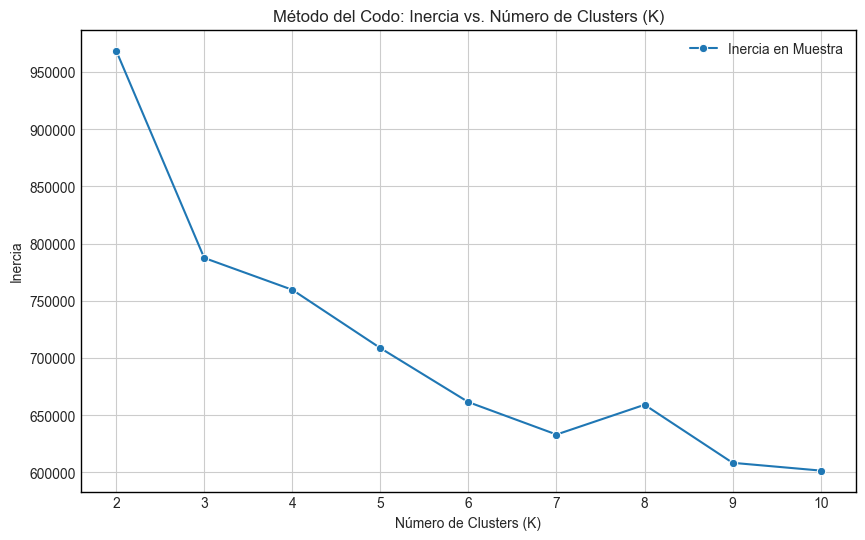

In [ ]:
# Datos que proporcionaste (ajusta si usaste otro rango de K o métricas en el futuro)
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia_sample = [968791.35, 787542.89, 759704.21, 708744.31, 661489.18, 633162.39, 659182.33, 608437.82, 601647.84] # Inercia de tu muestra calculada

# Crear un DataFrame simple para graficar (opcional, pero útil con seaborn)
metrics_df = pd.DataFrame({
    'K': k_values,
    'Inercia (Muestra)': inertia_sample
})

# Graficar Inercia vs K
plt.figure(figsize=(10, 6))
sns.lineplot(x='K', y='Inercia (Muestra)', data=metrics_df, marker='o', label='Inercia en Muestra')
plt.title('Método del Codo: Inercia vs. Número de Clusters (K)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(k_values) # Asegura que se muestren todos los valores de K en el eje X
plt.legend()
plt.show()


Entrenando modelo K-Means final con K = 4 en el conjunto completo de datos preprocesados...

Segmentación completada con K = 4.
Se ha añadido la columna 'Segmento_Cliente' al DataFrame original.

Tamaño de cada segmento:
Segmento_Cliente
0     55992
1    471669
2    212671
3    156835
Name: count, dtype: int64

Características promedio de cada segmento:

Medias numéricas por segmento (en escala original):
                  Plazo_Meses  Numero_Empleados  Empleos_Creados  \
Segmento_Cliente                                                   
0                  206.709441         43.289416         7.400611   
1                   69.282217          6.629204         1.771371   
2                   83.936235         10.645071         0.239050   
3                  238.126356         15.458444        40.011713   

                  Empleos_Retenidos  Monto_Aprobado_Banco  Monto_Aprobado_SBA  
Segmento_Cliente                                                               
0                    

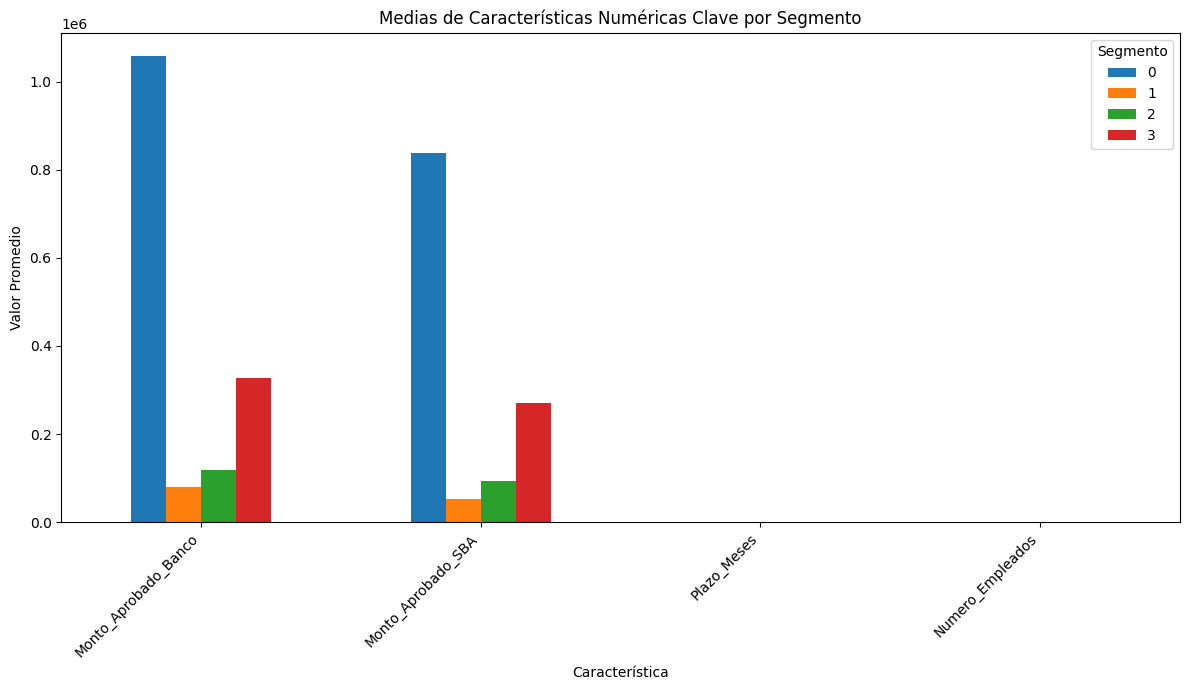


Distribución de características categóricas por segmento:

Distribución para 'Estado_Empresa':
    Segmento_Cliente Estado_Empresa  proportion
0                  0             CA    0.243017
1                  0             TX    0.096067
2                  0             FL    0.052347
3                  0             GA    0.043185
4                  0             NY    0.033505
5                  1             CA    0.128749
6                  1             NY    0.075850
7                  1             TX    0.071858
8                  1             FL    0.052993
9                  1             PA    0.047887
10                 2             CA    0.103089
11                 2             TX    0.091846
12                 2             NY    0.065651
13                 2             PA    0.035731
14                 2             MO    0.034208
15                 3             CA    0.218255
16                 3             TX    0.073938
17                 3             FL    0

C:\Users\jamal\AppData\Local\Temp\ipykernel_30104\60192518.py:79: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\jamal\AppData\Local\Temp\ipykernel_30104\60192518.py:79: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\jamal\AppData\Local\Temp\ipykernel_30104\60192518.py:79: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a futu

    Segmento_Cliente Negocio_Existente  proportion
0                  0               1.0    0.786130
1                  0               2.0    0.211209
2                  0               0.0    0.002661
3                  1               1.0    0.698278
4                  1               2.0    0.300963
5                  1               0.0    0.000759
6                  2               1.0    0.668432
7                  2               2.0    0.330003
8                  2               0.0    0.001566
9                  3               1.0    0.815615
10                 3               2.0    0.182332
11                 3               0.0    0.002053

Distribución para 'Area_UrbanRural':
    Segmento_Cliente Area_UrbanRural  proportion
0                  0               1    0.551882
1                  0               0    0.331583
2                  0               2    0.116535
3                  1               1    0.827578
4                  1               2    0.167490
5    

C:\Users\jamal\AppData\Local\Temp\ipykernel_30104\60192518.py:79: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\jamal\AppData\Local\Temp\ipykernel_30104\60192518.py:79: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
# Celda 24: Aplicar K-Means con el K Seleccionado e Interpretar Segmentos

# Importar librerías si no están ya
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que X_segmentation y df estén disponibles desde celdas anteriores
# Asegúrate de que numerical_cols_seg y categorical_cols_seg estén disponibles desde Celda 22

# --- Aplicar K-Means al Conjunto Completo ---

# Elige el número óptimo de segmentos (K) basándote en los gráficos de la Celda 23
optimal_k = 4 # <-- ¡AJUSTA ESTE VALOR BASÁNDOTE EN TU ANÁLISIS VISUAL DE LOS GRÁFICOS!

print(f"\nEntrenando modelo K-Means final con K = {optimal_k} en el conjunto completo de datos preprocesados...")

# Entrenar el modelo K-Means final con el K óptimo en *todos* los datos preprocesados
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto', max_iter=300)
kmeans_final.fit(X_segmentation) # <-- ¡Entrenar en el CONJUNTO COMPLETO X_segmentation!

# Añadir las etiquetas de segmento al DataFrame original
df['Segmento_Cliente'] = kmeans_final.labels_

print(f"\nSegmentación completada con K = {optimal_k}.")
print("Se ha añadido la columna 'Segmento_Cliente' al DataFrame original.")
print("\nTamaño de cada segmento:")
print(df['Segmento_Cliente'].value_counts().sort_index())

# --- Interpretar los segmentos ---
print("\nCaracterísticas promedio de cada segmento:")

# Para interpretar, agrupamos el DataFrame *original* (o una copia con nulos imputados) por el nuevo Segmento_Cliente
# y calculamos la media de las características originales antes del escalado/OHE.
# Usaremos df_segmentation que ya tenía los nulos imputados y tipos categóricos como string.

# Añadir las etiquetas de segmento también a df_segmentation para el análisis
df_segmentation['Segmento_Cliente'] = kmeans_final.labels_

# Calcular la media de las características numéricas por segmento usando df_segmentation
print("\nMedias numéricas por segmento (en escala original):")
# Nos aseguramos de que las columnas numéricas existan en df_segmentation antes de agrupar
numeric_summary = df_segmentation.groupby('Segmento_Cliente')[numerical_cols_seg].mean()
print(numeric_summary)

# Visualizar las medias numéricas por segmento (opcional, puede ser complejo si hay muchas features)
# Selecciona algunas columnas numéricas clave para visualizar
key_numeric_seg_visualize = ['Monto_Aprobado_Banco', 'Monto_Aprobado_SBA', 'Plazo_Meses', 'Numero_Empleados']
if all(col in numeric_summary.columns for col in key_numeric_seg_visualize):
    print("\nVisualizando medias numéricas clave por segmento:")
    numeric_summary_T = numeric_summary[key_numeric_seg_visualize].T # Transponer para mejor visualización
    numeric_summary_T.plot(kind='bar', figsize=(12, 7))
    plt.title('Medias de Características Numéricas Clave por Segmento')
    plt.xlabel('Característica')
    plt.ylabel('Valor Promedio')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Segmento')
    plt.tight_layout()
    plt.show()
else:
    print("No se pueden visualizar las medias numéricas clave. Asegúrate de que existan en numeric_summary.")


# Para las características categóricas: Ver las frecuencias o la moda por segmento.
# Esto te dice qué categorías son predominantes en cada segmento.
print("\nDistribución de características categóricas por segmento:")
# Selecciona algunas columnas categóricas clave para analizar
key_categorical_seg_analyze = ['Estado_Empresa', 'Codigo_NAICS', 'Negocio_Existente', 'Area_UrbanRural', 'Linea_Credito_Rotativa'] # Elige las más relevantes
for col in key_categorical_seg_analyze:
    if col in df_segmentation.columns:
        print(f"\nDistribución para '{col}':")
        # Mostrar las top N categorías por segmento
        top_n_categories = 5 # Ajusta cuántas top categorías quieres ver
        # Calcula la frecuencia relativa de las categorías por segmento
        freq_table = df_segmentation.groupby('Segmento_Cliente')[col].value_counts(normalize=True).rename('proportion').reset_index()
        # Encuentra las top N categorías para cada segmento
        top_categories_by_segment = freq_table.groupby('Segmento_Cliente').apply(lambda x: x.nlargest(top_n_categories, 'proportion')).reset_index(drop=True)
        print(top_categories_by_segment) # Mostrar una tabla resumida

        # Visualizar las distribuciones categóricas clave (opcional, puede ser complejo)
        # sns.countplot(x='Segmento_Cliente', hue=col, data=df_segmentation) # Puede ser denso si muchas categorías
        # plt.title(f'Distribución de {col} por Segmento')
        # plt.show()


# Conclusión de la interpretación
print("\nRevisa las tablas de medias y distribuciones para entender qué define a cada segmento.")
print("Ejemplos de lo que podrías buscar:")
print("- Segmentos con montos de préstamo muy altos vs. bajos.")
print("- Segmentos con plazos de préstamo largos vs. cortos.")
print("- Segmentos de negocios existentes vs. nuevos.")
print("- Segmentos concentrados en ciertas industrias (NAICS) o ubicaciones (Estado, Area_UrbanRural).")
print("- Segmentos que típicamente solicitan líneas de crédito o LowDoc.")

In [ ]:

def load_sample_data(sample_path='tu_muestra_datos_originales.parquet'):
    # ... código para cargar los datos ...
    pass # Esta función devuelve el DataFrame o None

# La variable df_sample_original se define aquí:
df_sample_original = load_sample_data('tu_muestra_datos_originales.parquet')

# ... y luego usas df_sample_original en tu lógica ...

In [ ]:
# --- Preparación de Datos para Clustering ---
if df_sample_original is not None and not df_sample_original.empty:

    # Características a usar para el clustering (selecciona numéricas relevantes)
    clustering_features = [
        'Monto_Aprobado_Banco',
        'Plazo_Meses',
        'Numero_Empleados',
        'Empleos_Creados',
        'Empleos_Retenidos'
    ]

    # Filtrar características disponibles en el DataFrame
    available_clustering_features = [feat for feat in clustering_features if feat in df_sample_original.columns]

    if len(available_clustering_features) < 2:
        print("No hay suficientes columnas numéricas disponibles para el clustering.")
        df_clustered = None # No se puede clusterizar
    else:
        df_for_clustering = df_sample_original[available_clustering_features].copy()

        # Manejar faltantes: Imputación simple (puedes usar dropna() si prefieres eliminar filas)
        # Usamos SimpleImputer para mayor robustez
        imputer = SimpleImputer(strategy='median')
        df_for_clustering_imputed = imputer.fit_transform(df_for_clustering)
        df_for_clustering_imputed = pd.DataFrame(df_for_clustering_imputed, columns=available_clustering_features, index=df_for_clustering.index)
        print(f"Datos después de imputar faltantes: {df_for_clustering_imputed.shape}")


        # Manejar Outliers (opcional pero recomendado para K-Means)
        # Clipear valores extremos al cuantil 99%
        for col in available_clustering_features:
            upper_limit = df_for_clustering_imputed[col].quantile(0.99)
            df_for_clustering_imputed[col] = df_for_clustering_imputed[col].clip(upper=upper_limit)
        print("Outliers clipeados al cuantil 99%.")


        # Escalar los datos
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(df_for_clustering_imputed)
        print("Datos escalados.")

        # --- Aplicar K-Means ---
        # Define el número de clusters (ej. 3 o 4). Puedes experimentar.
        n_clusters = 4 # <--- Número de clusters a definir

        try:
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto') # n_init='auto' recomendado
            cluster_labels = kmeans.fit_predict(data_scaled)
            print(f"Clustering K-Means aplicado con {n_clusters} clusters.")

            # Añadir las etiquetas de cluster al DataFrame original (para las filas usadas)
            # Es importante añadirlo al DataFrame original (o una copia) para el análisis posterior
            df_clustered = df_sample_original.loc[df_for_clustering_imputed.index].copy() # Tomar solo las filas que no tuvieron faltantes
            df_clustered['Cluster'] = cluster_labels
            print("Etiquetas de cluster añadidas al DataFrame.")

        except Exception as e:
            print(f"Error durante el proceso de clustering K-Means: {e}")
            df_clustered = None # Algo salió mal

else:
    print("No se pudo realizar el clustering porque los datos de muestra no se cargaron o están vacíos.")
    df_clustered = None # No se puede clusterizar

Datos después de imputar faltantes: (5000, 5)
Outliers clipeados al cuantil 99%.
Datos escalados.
Clustering K-Means aplicado con 4 clusters.
Etiquetas de cluster añadidas al DataFrame.


In [ ]:
if df_clustered is not None:
    print("\n--- Análisis por Cluster ---")

    # Estadísticas descriptivas de las características de clustering por cluster
    print("\nEstadísticas (Media y Mediana) de características de clustering por Cluster:")
    cluster_summary_features = df_clustered.groupby('Cluster')[available_clustering_features].agg(['mean', 'median']).round(2)
    print(cluster_summary_features)


    # Añadir análisis de otras características relevantes (categóricas, etc.)
    # Por ejemplo, si tienes 'Negocio_Existente' o 'Area_UrbanRural'
    categorical_for_analysis = ['Negocio_Existente', 'Area_UrbanRural', 'Linea_Credito_Rotativa', 'Programa_LowDoc']
    available_categorical = [c for c in categorical_for_analysis if c in df_clustered.columns]

    if available_categorical:
        print("\nDistribución de características categóricas por Cluster (%):")
        for cat_col in available_categorical:
            # Calcular la tabla de frecuencias y normalizar
            cluster_cat_distribution = df_clustered.groupby('Cluster')[cat_col].value_counts(normalize=True).unstack(fill_value=0).round(4) * 100
            print(f"\n--- {cat_col} por Cluster ---")
            print(cluster_cat_distribution)

    # Análisis de la Tasa de Aprobación por Cluster
    # Asegúrate de tener una columna que represente el estado final (ej. 'Loan_Status', 'Aprobado')
    # Y mapea si es necesario (ej. 'Aprobado' -> 1, 'Rechazado' -> 0)
    approval_column_name = 'Loan_Status' # <--- ¡AJUSTA ESTO AL NOMBRE REAL DE TU COLUMNA DE ESTADO!
    if approval_column_name in df_clustered.columns:
        # Mapeo simple si la columna es de texto (ajusta si tus etiquetas son diferentes)
        # Asumimos 'Aprobado' es 1 y cualquier otra cosa es 0
        approval_mapping = {'Aprobado': 1, 'Paid in Full': 1, 'Charged Off': 0, 'Default': 0} # <--- ¡AJUSTA ESTE MAPEO!

        # Convertir a numérico, manejando posibles valores no mapeados
        df_clustered['Is_Approved_Numeric'] = df_clustered[approval_column_name].map(approval_mapping).fillna(0)

        approval_rate_by_cluster = df_clustered.groupby('Cluster')['Is_Approved_Numeric'].mean().reset_index()
        approval_rate_by_cluster['Tasa_Aprobacion (%)'] = approval_rate_by_cluster['Is_Approved_Numeric'] * 100

        print("\nTasa de Aprobación Promedio por Cluster:")
        print(approval_rate_by_cluster[['Cluster', 'Tasa_Aprobacion (%)']].round(2))

    else:
        print(f"\nNo se encontró la columna '{approval_column_name}' para calcular la tasa de aprobación por cluster.")


--- Análisis por Cluster ---

Estadísticas (Media y Mediana) de características de clustering por Cluster:
        Monto_Aprobado_Banco           Plazo_Meses        Numero_Empleados  \
                        mean    median        mean median             mean   
Cluster                                                                      
0                  854721.32  785000.0      174.16  180.0            41.94   
1                   86693.34   50000.0       71.84   84.0             5.74   
2                  324840.29  275000.0      242.82  240.0             8.22   
3                  375840.12  250000.0      137.12  118.0            57.69   

               Empleos_Creados        Empleos_Retenidos         
        median            mean median              mean median  
Cluster                                                         
0         25.0            4.74    0.0              3.40    0.0  
1          3.0            0.82    0.0              2.56    1.0  
2          5.0      


--- Visualizaciones de Clusters ---

Generando Pair Plot (puede tardar)...


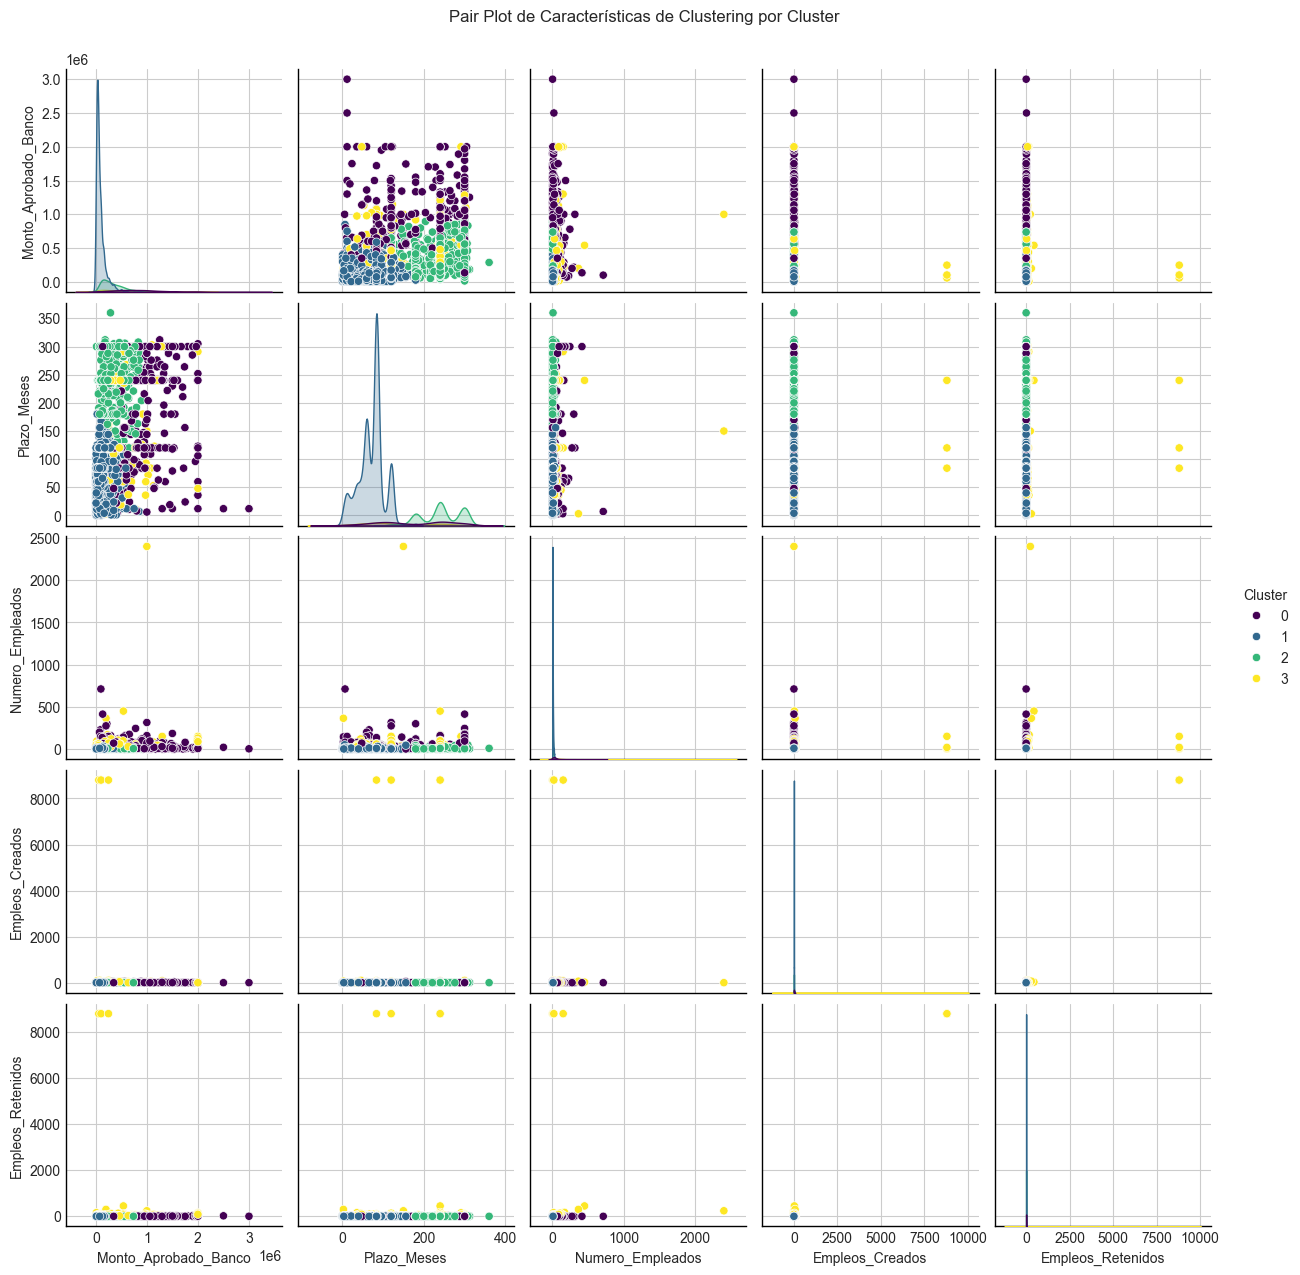

Pair Plot generado.

Generando Box Plots de Características por Cluster...


C:\Users\jamal\AppData\Local\Temp\ipykernel_30104\4171737365.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




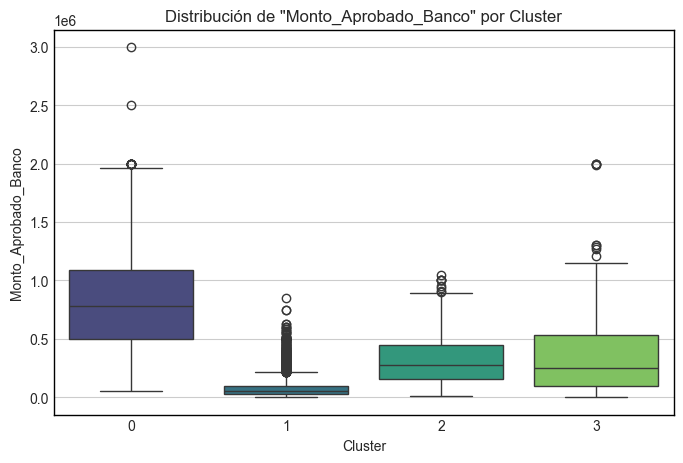

C:\Users\jamal\AppData\Local\Temp\ipykernel_30104\4171737365.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




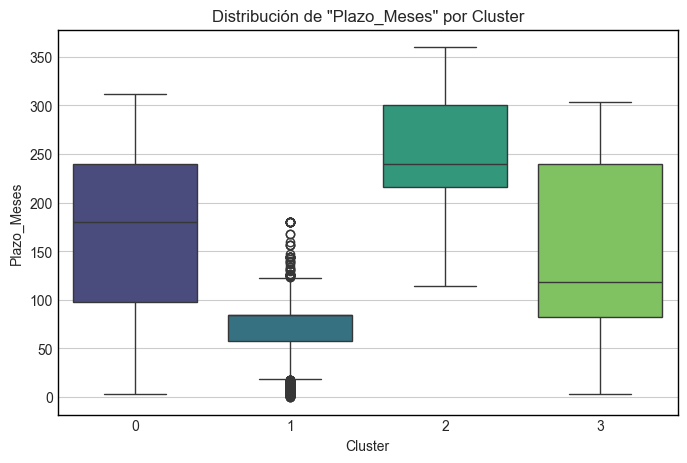

C:\Users\jamal\AppData\Local\Temp\ipykernel_30104\4171737365.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




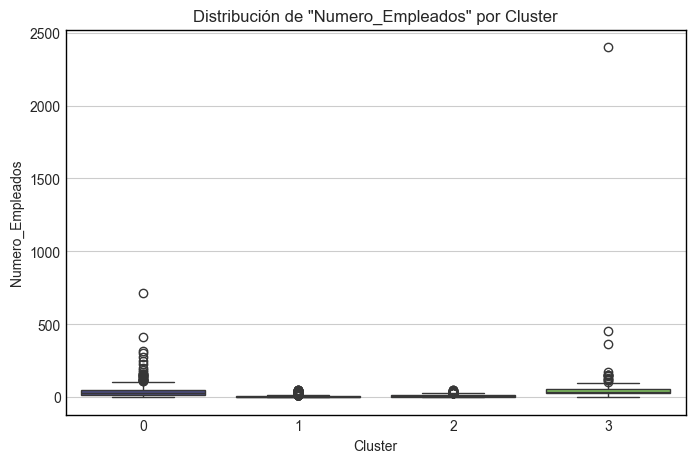

C:\Users\jamal\AppData\Local\Temp\ipykernel_30104\4171737365.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




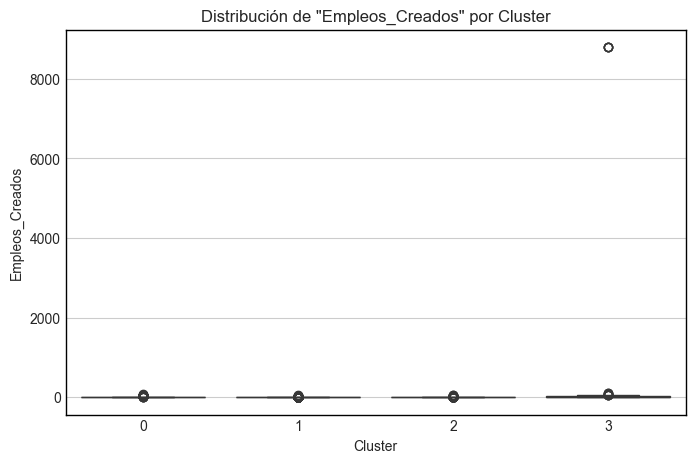

C:\Users\jamal\AppData\Local\Temp\ipykernel_30104\4171737365.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




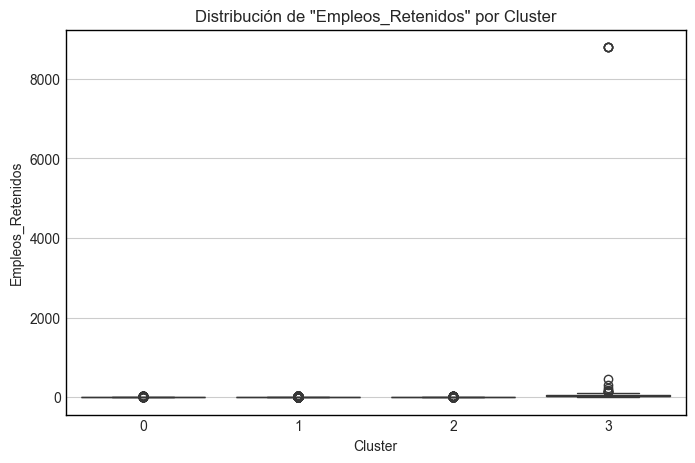

Box Plots generados.

Generando Gráficos de Distribución Categórica por Cluster...


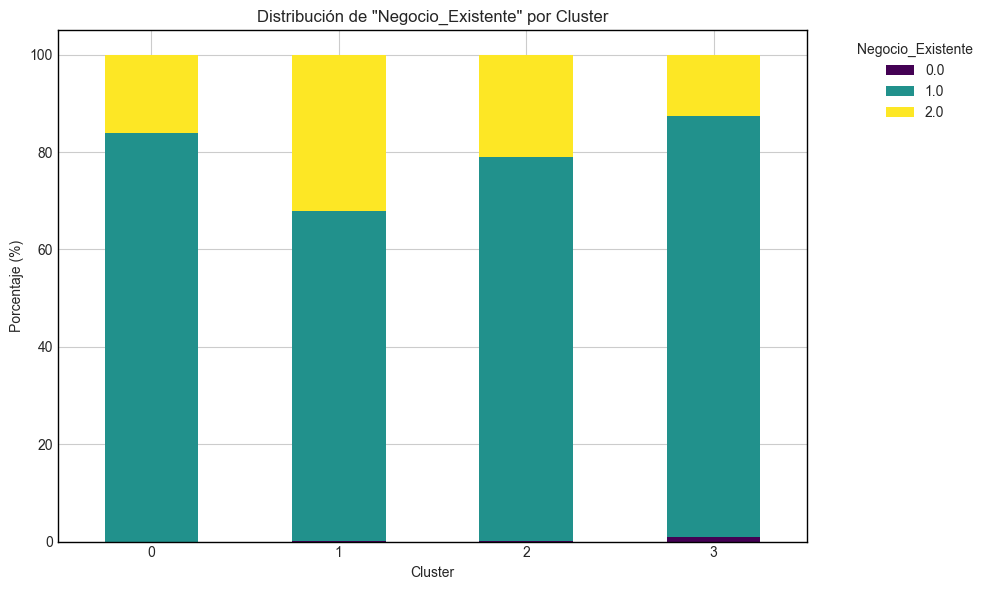

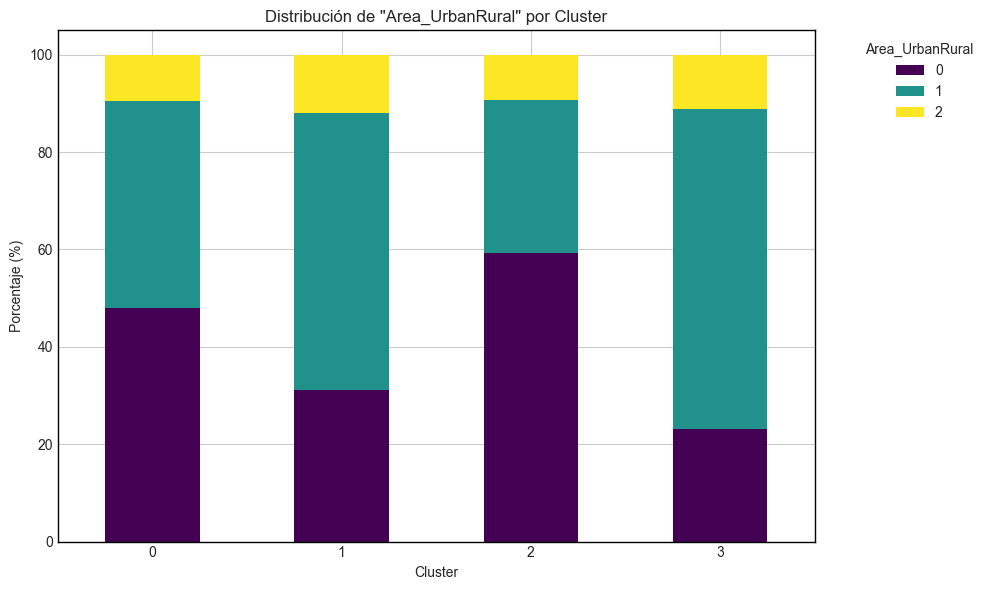

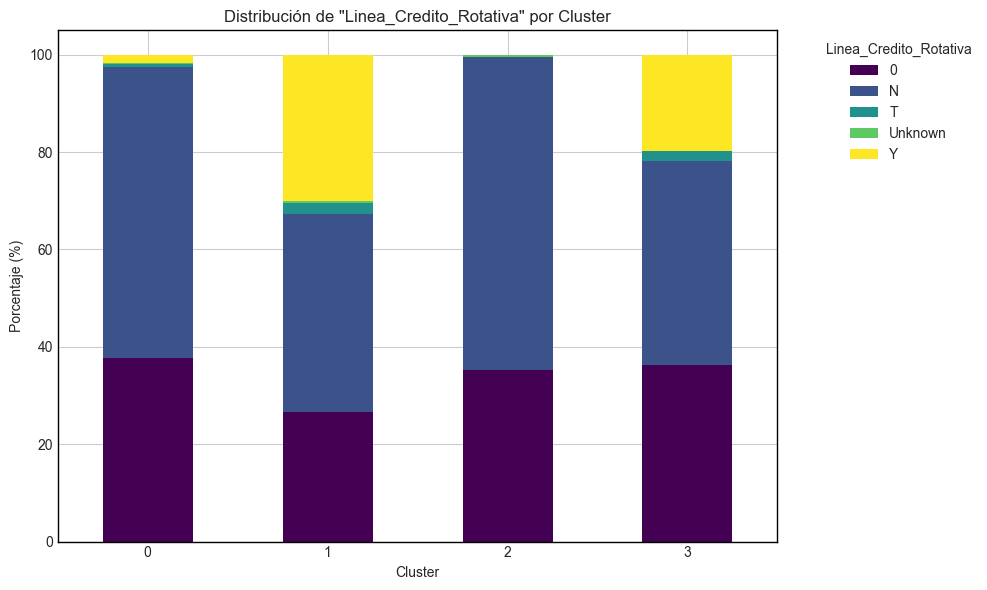

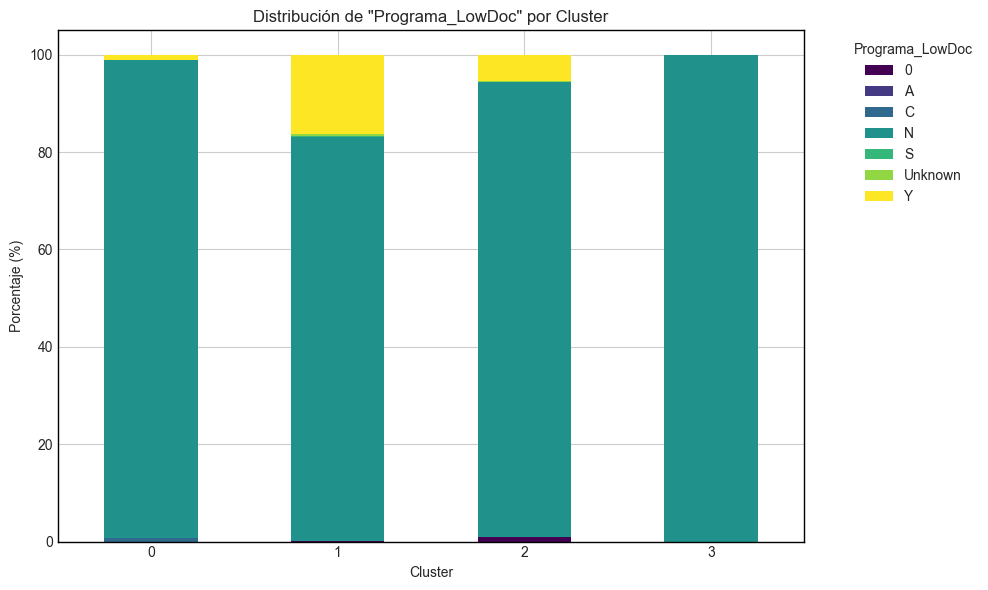

Gráficos de Distribución Categórica generados.


In [ ]:
if df_clustered is not None:
    print("\n--- Visualizaciones de Clusters ---")

    # Pair plot de las características de clustering, coloreado por cluster
    # Útil para ver la separación entre clusters en pares de características
    if len(available_clustering_features) <= 6: # Pairplot es manejable con hasta 5-6 features
        print("\nGenerando Pair Plot (puede tardar)...")
        try:
            # Usamos el DataFrame original (filtrado y clipeado si aplica) para el pairplot
            # Con la columna 'Cluster' añadida
            g = sns.pairplot(df_clustered, vars=available_clustering_features, hue='Cluster', palette='viridis', diag_kind='kde') # diag_kind='kde' si quieres densidad en la diagonal
            g.fig.suptitle("Pair Plot de Características de Clustering por Cluster", y=1.02) # Ajustar título
            plt.show()
            print("Pair Plot generado.")
        except Exception as e:
             print(f"Error al generar el Pair Plot: {e}")

    else:
        print(f"\nPair Plot omitido: Demasiadas características ({len(available_clustering_features)}) para un Pair Plot claro. Considera otras visualizaciones.")


    # Box plots o Violin plots de características por cluster
    # Muestran la distribución de una característica numérica dentro de cada cluster
    print("\nGenerando Box Plots de Características por Cluster...")
    for i, feature in enumerate(available_clustering_features):
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Cluster', y=feature, data=df_clustered, palette='viridis')
        plt.title(f'Distribución de "{feature}" por Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(feature)
        plt.show()
    print("Box Plots generados.")


    # Gráfico de barras para la Tasa de Aprobación por Cluster
    if 'Is_Approved_Numeric' in df_clustered.columns:
        print("\nGenerando Gráfico de Tasa de Aprobación por Cluster...")
        try:
            # Recalcular por si acaso (aunque ya lo hicimos antes)
            approval_rate_plot_data = df_clustered.groupby('Cluster')['Is_Approved_Numeric'].mean().reset_index()
            approval_rate_plot_data['Tasa_Aprobacion (%)'] = approval_rate_plot_data['Is_Approved_Numeric'] * 100

            plt.figure(figsize=(8, 5))
            sns.barplot(x='Cluster', y='Tasa_Aprobacion (%)', data=approval_rate_plot_data, palette='viridis')
            plt.title("Tasa de Aprobación Promedio por Cluster")
            plt.xlabel("Cluster")
            plt.ylabel("Tasa de Aprobación (%)")
            plt.ylim(0, 100) # La tasa está entre 0 y 100%
            plt.show()
            print("Gráfico de Tasa de Aprobación generado.")
        except Exception as e:
            print(f"Error al generar el gráfico de Tasa de Aprobación: {e}")


    # Gráfico de barras para alguna característica categórica clave por cluster
    # Por ejemplo, Area_UrbanRural, Negocio_Existente, etc.
    if available_categorical:
         print("\nGenerando Gráficos de Distribución Categórica por Cluster...")
         for cat_col in available_categorical:
             if cat_col in df_clustered.columns:
                 plt.figure(figsize=(10, 6))
                 # Usar crosstab y luego plotear
                 ct = pd.crosstab(df_clustered['Cluster'], df_clustered[cat_col], normalize='index') * 100
                 ct.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca()) # Usar ax=plt.gca() para plotear en la figura actual
                 plt.title(f'Distribución de "{cat_col}" por Cluster')
                 plt.xlabel("Cluster")
                 plt.ylabel("Porcentaje (%)")
                 plt.xticks(rotation=0) # Rotar etiquetas del eje X si es necesario
                 plt.legend(title=cat_col, bbox_to_anchor=(1.05, 1), loc='upper left') # Leyenda fuera del gráfico
                 plt.tight_layout() # Ajustar layout
                 plt.show()
         print("Gráficos de Distribución Categórica generados.")


else:
    print("\nNo se pueden generar gráficos de clusters porque el clustering no se realizó correctamente.")